In [143]:

options(digits = 2)

txt = readLines("offline.final.trace.txt")

sum(substr(txt, 1, 1) == "#")

length(txt)

strsplit(txt[4], ";")[[1]]

tokens = strsplit(txt[4], "[;=,]")[[1]]

tokens[1:10]

tokens[c(2, 4, 6:8, 10)]

tokens[ - ( 1:10 ) ]

tmp = matrix(tokens[ - (1:10) ], ncol = 4, byrow = TRUE)
mat = cbind(matrix(tokens[c(2, 4, 6:8, 10)], nrow = nrow(tmp),
                   ncol = 6, byrow = TRUE), 
            tmp)

dim(mat)

processLine =
function(x)
{
  tokens = strsplit(x, "[;=,]")[[1]]
  tmp = matrix(tokens[ - (1:10) ], ncol = 4, byrow = TRUE)
  cbind(matrix(tokens[c(2, 4, 6:8, 10)], nrow = nrow(tmp),
               ncol = 6, byrow = TRUE), tmp)
}

tmp = lapply(txt[4:20], processLine)

sapply(tmp, nrow)

offline = as.data.frame(do.call("rbind", tmp))
dim(offline)

lines = txt[ substr(txt, 1, 1) != "#" ]
tmp = lapply(lines, processLine)

processLine = function(x)
{
  tokens = strsplit(x, "[;=,]")[[1]]
  
  if (length(tokens) == 10) 
    return(NULL)
 
  tmp = matrix(tokens[ - (1:10) ], , 4, byrow = TRUE)
  cbind(matrix(tokens[c(2, 4, 6:8, 10)], nrow(tmp), 6, 
               byrow = TRUE), tmp)
}

options(error = recover, warn = 1)
tmp = lapply(lines, processLine)
offline = as.data.frame(do.call("rbind", tmp), 
                        stringsAsFactors = FALSE)


[1] 5312

[1] 151392

[1] "t=1139643118358"                    "id=00:02:2D:21:0F:33"              
 [3] "pos=0.0,0.0,0.0"                    "degree=0.0"                        
 [5] "00:14:bf:b1:97:8a=-38,2437000000,3" "00:14:bf:b1:97:90=-56,2427000000,3"
 [7] "00:0f:a3:39:e1:c0=-53,2462000000,3" "00:14:bf:b1:97:8d=-65,2442000000,3"
 [9] "00:14:bf:b1:97:81=-65,2422000000,3" "00:14:bf:3b:c7:c6=-66,2432000000,3"
[11] "00:0f:a3:39:dd:cd=-75,2412000000,3" "00:0f:a3:39:e0:4b=-78,2462000000,3"
[13] "00:0f:a3:39:e2:10=-87,2437000000,3" "02:64:fb:68:52:e6=-88,2447000000,1"
[15] "02:00:42:55:31:00=-84,2457000000,1"

[1] "t"                 "1139643118358"     "id"               
 [4] "00:02:2D:21:0F:33" "pos"               "0.0"              
 [7] "0.0"               "0.0"               "degree"           
[10] "0.0"

[1] "1139643118358"     "00:02:2D:21:0F:33" "0.0"              
[4] "0.0"               "0.0"               "0.0"

[1] "00:14:bf:b1:97:8a" "-38"               "2437000000"       
 [4] "3"                 "00:14:bf:b1:97:90" "-56"              
 [7] "2427000000"        "3"                 "00:0f:a3:39:e1:c0"
[10] "-53"               "2462000000"        "3"                
[13] "00:14:bf:b1:97:8d" "-65"               "2442000000"       
[16] "3"                 "00:14:bf:b1:97:81" "-65"              
[19] "2422000000"        "3"                 "00:14:bf:3b:c7:c6"
[22] "-66"               "2432000000"        "3"                
[25] "00:0f:a3:39:dd:cd" "-75"               "2412000000"       
[28] "3"                 "00:0f:a3:39:e0:4b" "-78"              
[31] "2462000000"        "3"                 "00:0f:a3:39:e2:10"
[34] "-87"               "2437000000"        "3"                
[37] "02:64:fb:68:52:e6" "-88"               "2447000000"       
[40] "1"                 "02:00:42:55:31:00" "-84"              
[43] "2457000000"        "1"

[1] 11 10

[1] 11 10 10 11  9 10  9  9 10 11 11  9  9  9  8 10 14

[1] 170  10

Warning message in matrix(tokens[c(2, 4, 6:8, 10)], nrow = nrow(tmp), ncol = 6, :
"data length exceeds size of matrix"Warning message in matrix(tokens[c(2, 4, 6:8, 10)], nrow = nrow(tmp), ncol = 6, :
"data length exceeds size of matrix"Warning message in matrix(tokens[c(2, 4, 6:8, 10)], nrow = nrow(tmp), ncol = 6, :
"data length exceeds size of matrix"Warning message in matrix(tokens[c(2, 4, 6:8, 10)], nrow = nrow(tmp), ncol = 6, :
"data length exceeds size of matrix"Warning message in matrix(tokens[c(2, 4, 6:8, 10)], nrow = nrow(tmp), ncol = 6, :
"data length exceeds size of matrix"Warning message in matrix(tokens[c(2, 4, 6:8, 10)], nrow = nrow(tmp), ncol = 6, :
"data length exceeds size of matrix"

# Processing of data raw to format that can used for analysis. Separates the text file and creates a sort of data frame with fields given in the names(offline) in the next cell below.

In [144]:
dim(offline)

names(offline) = c("time", "scanMac", "posX", "posY", "posZ", 
                   "orientation", "mac", "signal", 
                   "channel", "type")

numVars = c("time", "posX", "posY", "posZ", 
            "orientation", "signal")
offline[ numVars ] =  lapply(offline[ numVars ], as.numeric)

offline = offline[ offline$type == "3", ]
offline = offline[ , "type" != names(offline) ]
dim(offline)

offline$rawTime = offline$time
offline$time = offline$time/1000
class(offline$time) = c("POSIXt", "POSIXct")

[1] 1181628      10

[1] 978443      9

# Creates the field names and also changes the formatting of the variables to numeric since all were character before. Drops the adhoc data and coverts the time to milliseconds

time1       time2     scanMac        posX        posY        posZ 
   "POSIXt"   "POSIXct" "character"   "numeric"   "numeric"   "numeric" 
orientation         mac      signal     channel     rawTime 
  "numeric" "character"   "numeric" "character"   "numeric"

      time                          posX         posY           posZ  
 Min.   :2006-02-11 01:31:58   Min.   : 0   Min.   : 0.0   Min.   :0  
 1st Qu.:2006-02-11 07:21:27   1st Qu.: 2   1st Qu.: 3.0   1st Qu.:0  
 Median :2006-02-11 13:57:58   Median :12   Median : 6.0   Median :0  
 Mean   :2006-02-16 08:57:37   Mean   :14   Mean   : 5.9   Mean   :0  
 3rd Qu.:2006-02-19 08:52:40   3rd Qu.:23   3rd Qu.: 8.0   3rd Qu.:0  
 Max.   :2006-03-09 14:41:10   Max.   :33   Max.   :13.0   Max.   :0  
  orientation      signal   
 Min.   :  0   Min.   :-99  
 1st Qu.: 90   1st Qu.:-69  
 Median :180   Median :-60  
 Mean   :167   Mean   :-62  
 3rd Qu.:270   3rd Qu.:-53  
 Max.   :360   Max.   :-25  

                mac               channel                    scanMac      
 00:0f:a3:39:e1:c0:145862   2462000000:189774   00:02:2D:21:0F:33:978443  
 00:0f:a3:39:dd:cd:145619   2437000000:152124                             
 00:14:bf:b1:97:8a:132962   2412000000:145619                             
 00:14:bf:3b:c7:c6:126529   2432000000:126529                             
 00:14:bf:b1:97:90:122315   2427000000:122315                             
 00:14:bf:b1:97:8d:121325   2442000000:121325                             
 (Other)          :183831   (Other)   :120757                             

[1] 203

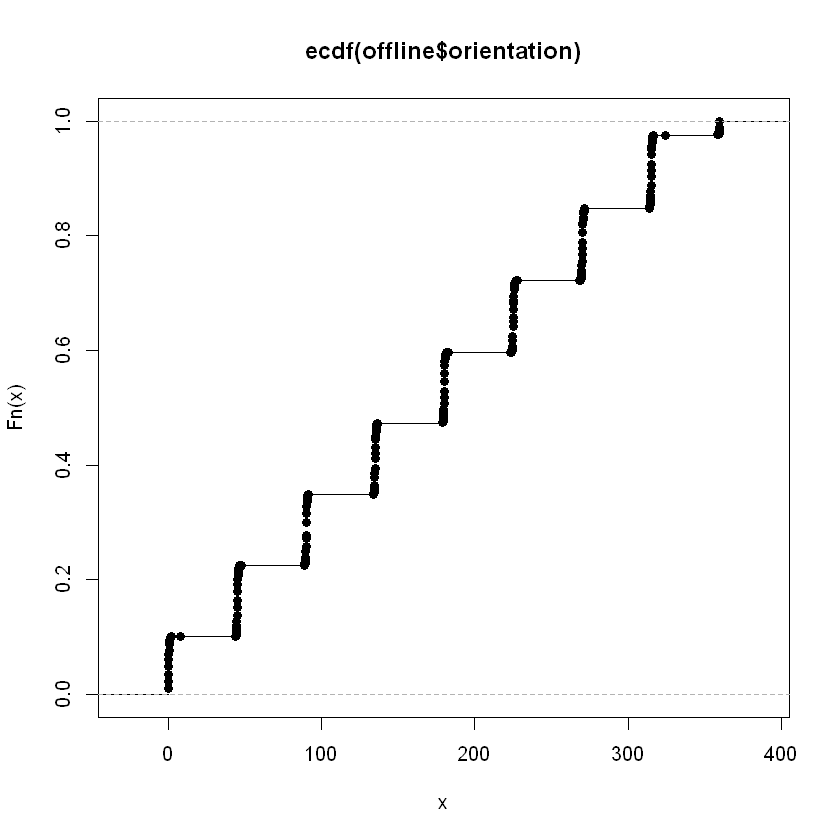

In [145]:
unlist(lapply(offline, class))

summary(offline[, numVars])

 summary(sapply(offline[ , c("mac", "channel", "scanMac")],
                as.factor))

offline = offline[ , !(names(offline) %in% c("scanMac", "posZ"))]

length(unique(offline$orientation))

plot(ecdf(offline$orientation))

# Checks the data for reasonableness. However, found the orientations are not exactly the same as the documentation for 8 basic orientations. Therefore, need to cleaning of data set later. 

null device 
          1

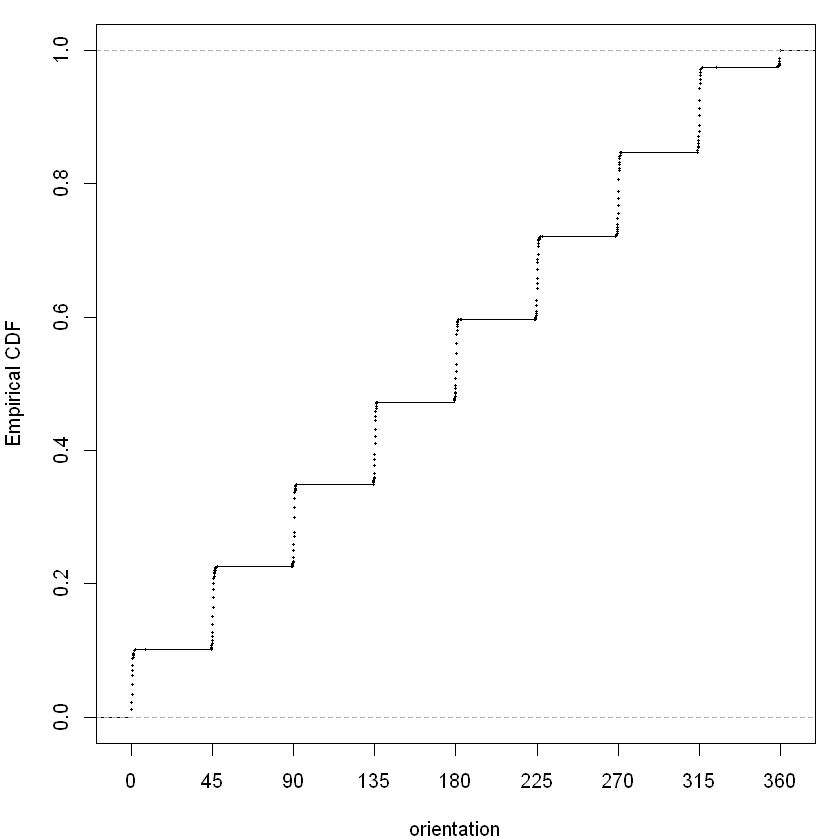

In [146]:
#pdf(file = "Geo_ECDFOrientation.pdf", width = 10, height = 7)
oldPar = par(mar = c(4, 4, 1, 1))
plot(ecdf(offline$orientation), pch = 19, cex = 0.3,
     xlim = c(-5, 365), axes = FALSE,
     xlab = "orientation", ylab = "Empirical CDF", main = "")
box()
axis(2)
axis(side = 1, at = seq(0, 360, by = 45))
par(oldPar)
dev.off()

# Changes the graph to look like the text.

null device 
          1

null device 
          1

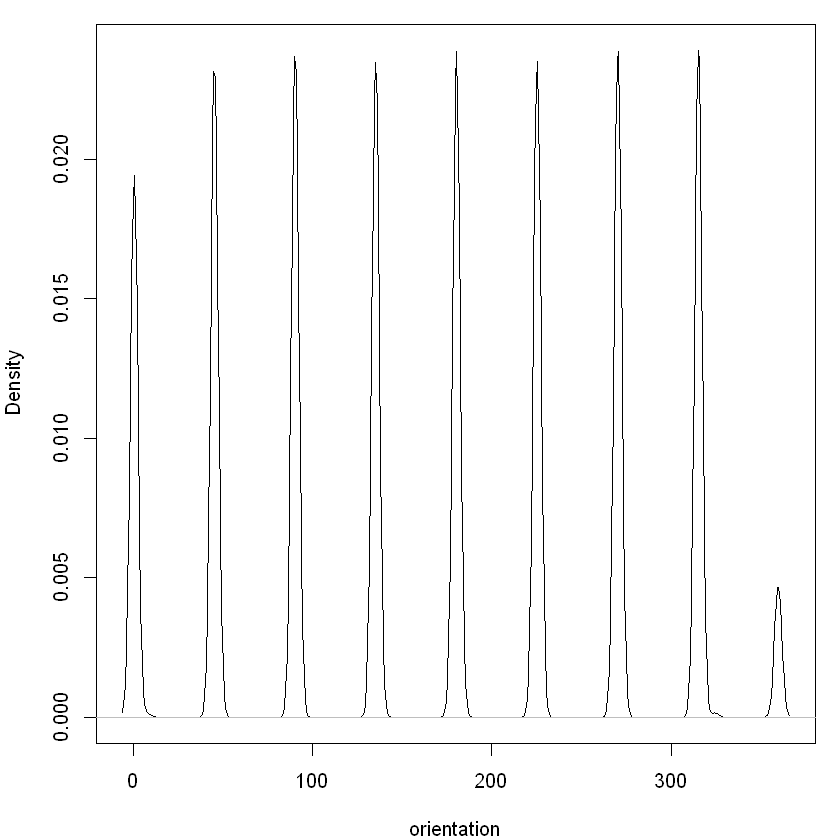

In [147]:
#pdf(file = "Geo_DensityOrientation.pdf", width = 10, height = 5)
oldPar = par(mar = c(4, 4, 1, 1))
plot(density(offline$orientation, bw = 2), 
 xlab = "orientation", main = "")
par(oldPar)
dev.off()

roundOrientation = function(angles) {
  refs = seq(0, by = 45, length  = 9)
  q = sapply(angles, function(o) which.min(abs(o - refs)))
  c(refs[1:8], 0)[q]
}

offline$angle = roundOrientation(offline$orientation)

#pdf(file = "Geo_BoxplotAngle.pdf", width = 10)
oldPar = par(mar = c(4, 4, 1, 1))

par(oldPar)
dev.off()

# Looks at density instead of box plots but the same concept to see if there is separate distributions or the one continous distribution. 

In [148]:
c(length(unique(offline$mac)), length(unique(offline$channel)))

table(offline$mac)

subMacs = names(sort(table(offline$mac), decreasing = TRUE))[1:7]
offline = offline[ offline$mac %in% subMacs, ]

macChannel = with(offline, table(mac, channel))
apply(macChannel, 1, function(x) sum(x > 0))

[1] 12  8


00:04:0e:5c:23:fc 00:0f:a3:39:dd:cd 00:0f:a3:39:e0:4b 00:0f:a3:39:e1:c0 
              418            145619             43508            145862 
00:0f:a3:39:e2:10 00:14:bf:3b:c7:c6 00:14:bf:b1:97:81 00:14:bf:b1:97:8a 
            19162            126529            120339            132962 
00:14:bf:b1:97:8d 00:14:bf:b1:97:90 00:30:bd:f8:7f:c5 00:e0:63:82:8b:a9 
           121325            122315               301               103 

00:0f:a3:39:dd:cd 00:0f:a3:39:e1:c0 00:14:bf:3b:c7:c6 00:14:bf:b1:97:81 
                1                 1                 1                 1 
00:14:bf:b1:97:8a 00:14:bf:b1:97:8d 00:14:bf:b1:97:90 
                1                 1                 1

# This where the mac addresses are kept and dropped

In [149]:
offline = offline[ , "channel" != names(offline)]

locDF = with(offline, 
             by(offline, list(posX, posY), function(x) x))
length(locDF)


sum(sapply(locDF, is.null))

locDF = locDF[ !sapply(locDF, is.null) ]

length(locDF)

locCounts = sapply(locDF, nrow)

locCounts = sapply(locDF, 
                   function(df) 
                     c(df[1, c("posX", "posY")], count = nrow(df)))

class(locCounts)

dim(locCounts)

locCounts[ , 1:8]

[1] 476

[1] 310

[1] 166

[1] "matrix"

[1]   3 166

posX,0,1,2,0,1,2,0,1
posY,0,0,0,1,1,1,2,2
count,5505,5505,5506,5524,5543,5558,5503,5564


null device 
          1

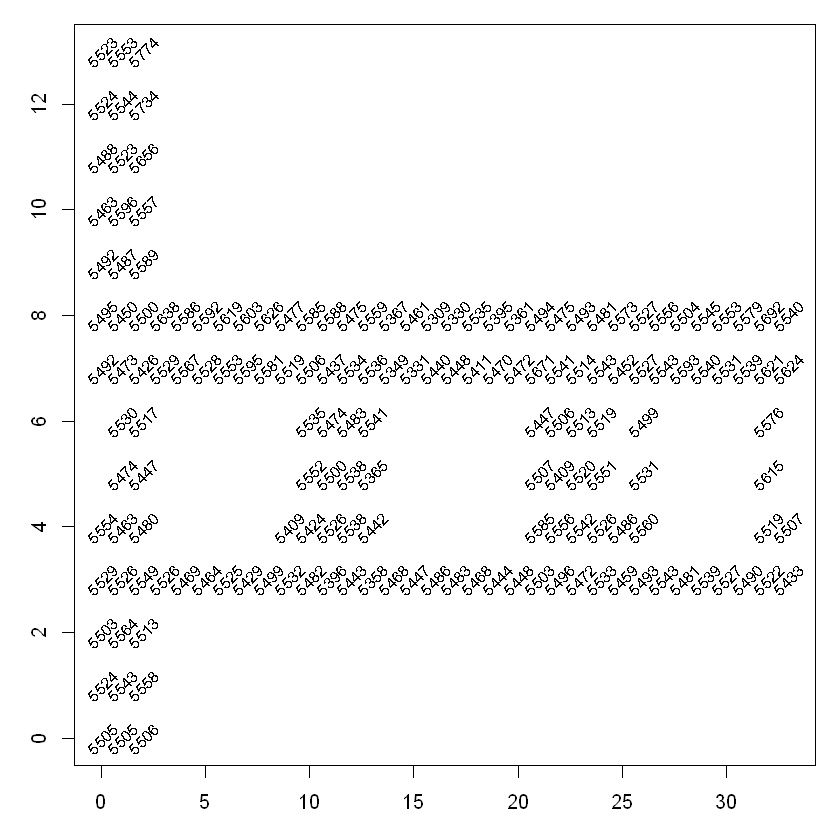

In [150]:
#pdf(file = "Geo_XYByCount.pdf", width = 10)
oldPar = par(mar = c(3.1, 3.1, 1, 1))

locCounts = t(locCounts)
plot(locCounts, type = "n", xlab = "", ylab = "")
text(locCounts, labels = locCounts[,3], cex = .8, srt = 45)

par(oldPar)
dev.off()

# Shows the distribution of the postition X and Y coordinates and where they are located on the map

# START HERE Original Data Set With MAC Address 00:0f:a3:39:e1:c0 

In [151]:
readData = 
  function(filename = 'offline.final.trace.txt', 
           subMacs = c("00:0f:a3:39:e1:c0", "00:14:bf:b1:97:8a",
                       "00:14:bf:3b:c7:c6", "00:14:bf:b1:97:90", "00:14:bf:b1:97:8d",
                       "00:14:bf:b1:97:81"))
  {
    txt = readLines(filename)
    lines = txt[ substr(txt, 1, 1) != "#" ]
    tmp = lapply(lines, processLine)
    offline0 = as.data.frame(do.call("rbind", tmp), 
                            stringsAsFactors= FALSE) 
    
    names(offline0) = c("time", "scanMac", 
                       "posX", "posY", "posZ", "orientation", 
                       "mac", "signal", "channel", "type")
    
     # keep only signals from access points
    offline0 = offline0[ offline0$type == "3", ]
    
    # drop scanMac, posZ, channel, and type - no info in them
    dropVars = c("scanMac", "posZ", "channel", "type")
    offline0 = offline0[ , !( names(offline0) %in% dropVars ) ]
    
    # drop more unwanted access points
    offline0 = offline0[ offline0$mac %in% subMacs, ]
    
    # convert numeric values
    numVars = c("time", "posX", "posY", "orientation", "signal")
    offline0[ numVars ] = lapply(offline0[ numVars ], as.numeric)

    # convert time to POSIX
    offline0$rawTime = offline0$time
    offline0$time = offline0$time/1000
    class(offline0$time) = c("POSIXt", "POSIXct")
    
    # round orientations to nearest 45
    offline0$angle = roundOrientation(offline0$orientation)
      
    return(offline0)
  }

# New MAC Address with 00:0f:a3:39:dd:cd

In [152]:
readDataNew = 
  function(filename = 'offline.final.trace.txt', 
           subMacs = c("00:0f:a3:39:dd:cd", "00:14:bf:b1:97:8a",
                       "00:14:bf:3b:c7:c6", "00:14:bf:b1:97:90", "00:14:bf:b1:97:8d",
                       "00:14:bf:b1:97:81"))
  {
    txt = readLines(filename)
    lines = txt[ substr(txt, 1, 1) != "#" ]
    tmp = lapply(lines, processLine)
    offline1 = as.data.frame(do.call("rbind", tmp), 
                            stringsAsFactors= FALSE) 
    
    names(offline1) = c("time", "scanMac", 
                       "posX", "posY", "posZ", "orientation", 
                       "mac", "signal", "channel", "type")
    
     # keep only signals from access points
    offline1 = offline1[ offline1$type == "3", ]
    
    # drop scanMac, posZ, channel, and type - no info in them
    dropVars = c("scanMac", "posZ", "channel", "type")
    offline1 = offline1[ , !( names(offline1) %in% dropVars ) ]
    
    # drop more unwanted access points
    offline1 = offline1[ offline1$mac %in% subMacs, ]
    
    # convert numeric values
    numVars = c("time", "posX", "posY", "orientation", "signal")
    offline1[ numVars ] = lapply(offline1[ numVars ], as.numeric)

    # convert time to POSIX
    offline1$rawTime = offline1$time
    offline1$time = offline1$time/1000
    class(offline1$time) = c("POSIXt", "POSIXct")
    
    # round orientations to nearest 45
    offline1$angle = roundOrientation(offline1$orientation)
      
    return(offline1)
  }

# Both MAC Addresses

In [153]:
readDataBoth = 
  function(filename = 'offline.final.trace.txt', 
           subMacs = c("00:0f:a3:39:e1:c0", "00:0f:a3:39:dd:cd", "00:14:bf:b1:97:8a",
                       "00:14:bf:3b:c7:c6", "00:14:bf:b1:97:90", "00:14:bf:b1:97:8d",
                       "00:14:bf:b1:97:81"))
  {
    txt = readLines(filename)
    lines = txt[ substr(txt, 1, 1) != "#" ]
    tmp = lapply(lines, processLine)
    offline2 = as.data.frame(do.call("rbind", tmp), 
                            stringsAsFactors= FALSE) 
    
    names(offline2) = c("time", "scanMac", 
                       "posX", "posY", "posZ", "orientation", 
                       "mac", "signal", "channel", "type")
    
     # keep only signals from access points
    offline2 = offline2[ offline2$type == "3", ]
    
    # drop scanMac, posZ, channel, and type - no info in them
    dropVars = c("scanMac", "posZ", "channel", "type")
    offline2 = offline2[ , !( names(offline2) %in% dropVars ) ]
    
    # drop more unwanted access points
    offline2 = offline2[ offline2$mac %in% subMacs, ]
    
    # convert numeric values
    numVars = c("time", "posX", "posY", "orientation", "signal")
    offline2[ numVars ] = lapply(offline2[ numVars ], as.numeric)

    # convert time to POSIX
    offline2$rawTime = offline2$time
    offline2$time = offline2$time/1000
    class(offline2$time) = c("POSIXt", "POSIXct")
    
    # round orientations to nearest 45
    offline2$angle = roundOrientation(offline2$orientation)
      
    return(offline2)
  }

In [154]:
offlineRedo = readData()
offlinenew = readDataNew()
offlineBoth = readDataBoth()

identical(offline, offlineRedo)

[1] FALSE

# Check for Original Data Set

In [155]:
macChannel0 = with(offlineRedo, table(mac))
apply(macChannel0, 1, function(x) sum(x > 0))

00:0f:a3:39:e1:c0 00:14:bf:3b:c7:c6 00:14:bf:b1:97:81 00:14:bf:b1:97:8a 
                1                 1                 1                 1 
00:14:bf:b1:97:8d 00:14:bf:b1:97:90 
                1                 1

# Check for New MAC Data Set

In [156]:
macChannel1 = with(offlinenew, table(mac))
apply(macChannel1, 1, function(x) sum(x > 0))

00:0f:a3:39:dd:cd 00:14:bf:3b:c7:c6 00:14:bf:b1:97:81 00:14:bf:b1:97:8a 
                1                 1                 1                 1 
00:14:bf:b1:97:8d 00:14:bf:b1:97:90 
                1                 1

# Check for Both MAC Data Set

In [157]:
macChannel2 = with(offlineBoth, table(mac))
apply(macChannel2, 1, function(x) sum(x > 0))

00:0f:a3:39:dd:cd 00:0f:a3:39:e1:c0 00:14:bf:3b:c7:c6 00:14:bf:b1:97:81 
                1                 1                 1                 1 
00:14:bf:b1:97:8a 00:14:bf:b1:97:8d 00:14:bf:b1:97:90 
                1                 1                 1

# I would start here for the data cleaning. Note here is where the condensed version of the data cleaning

# Graphs of the Box plots and Density Function of Original Data Set

null device 
          1

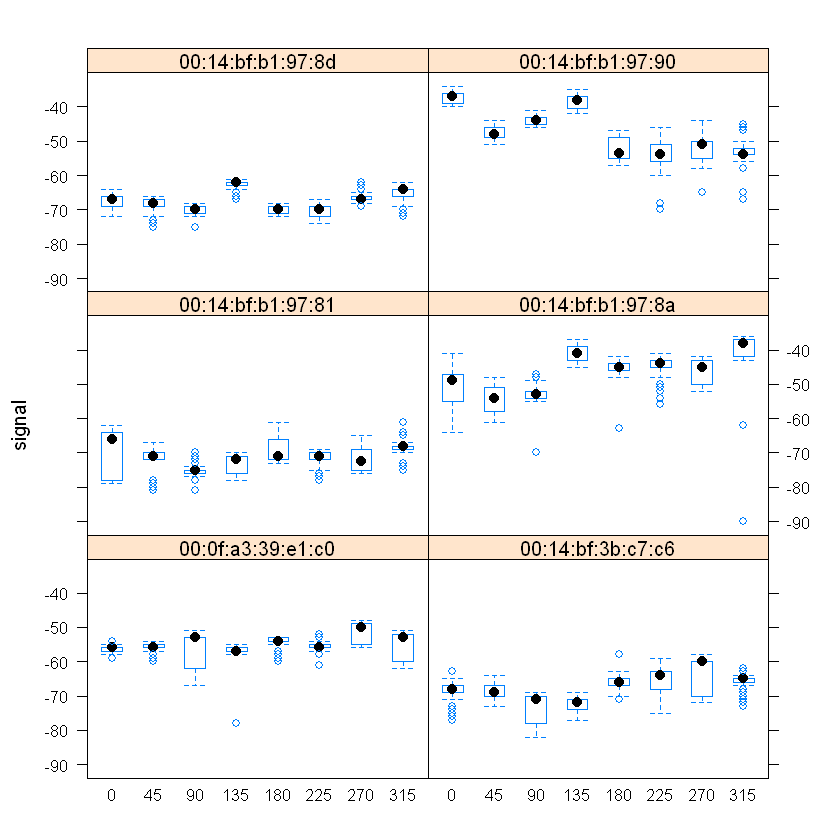

In [181]:
#pdf(file = "Geo_BoxplotSignalByMacAngle.pdf", width = 7)
oldPar = par(mar = c(3.1, 3, 1, 1))

library(lattice)
bwplot(signal ~ factor(angle) | mac, data = offlineRedo, 
       subset = posX == 2 & posY == 12 
                & mac != "00:0f:a3:39:dd:cd", 
       layout = c(2,3))

par(oldPar)
dev.off()

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    -93     -64     -58     -58     -51     -25 

null device 
          1

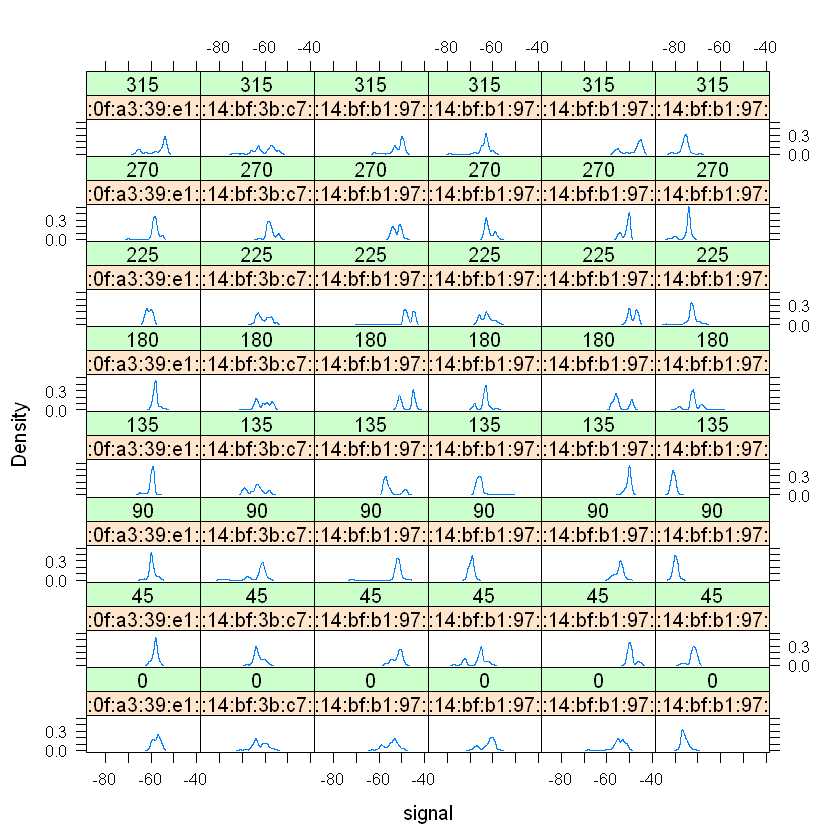

In [17]:
summary(offlineRedo$signal)

#pdf(file = "Geo_DensitySignalByMacAngle.pdf", width = 8, height = 12)
oldPar = par(mar = c(3.1, 3, 1, 1))

densityplot( ~ signal | mac + factor(angle), data = offlineRedo,
             subset = posX == 24 & posY == 4 & 
                         mac != "00:0f:a3:39:dd:cd",
             bw = 0.5, plot.points = FALSE)

par(oldPar)
dev.off()

# Graphs of the Box plots and Density Function of New Data Set

null device 
          1

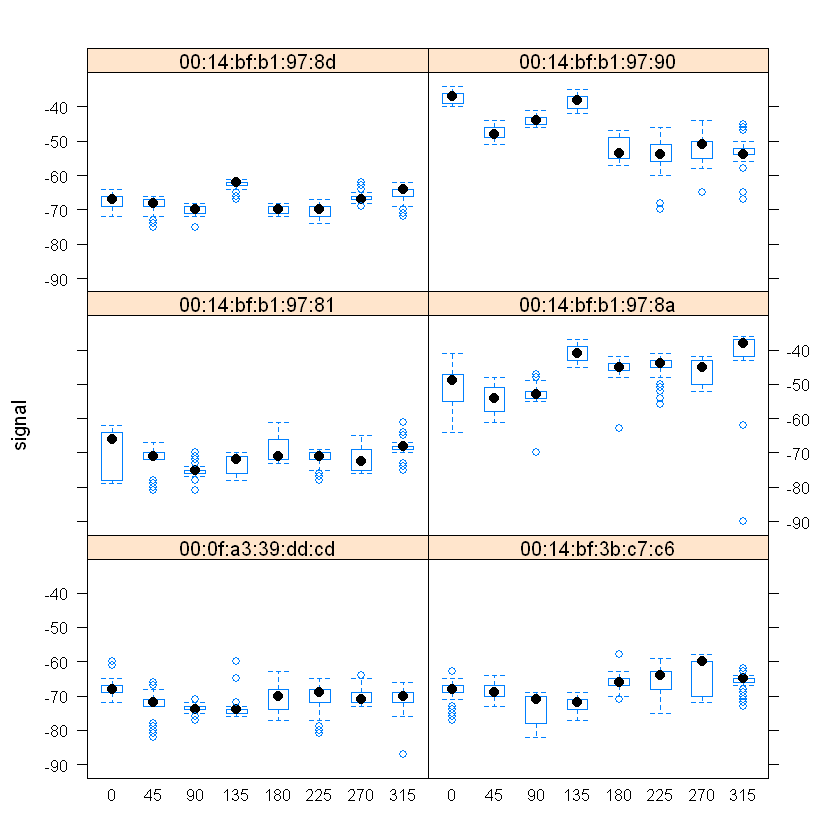

In [183]:
#pdf(file = "Geo_BoxplotSignalByMacAngle.pdf", width = 7)
oldPar = par(mar = c(3.1, 3, 1, 1))

library(lattice)
bwplot(signal ~ factor(angle) | mac, data = offlinenew, 
       subset = posX == 2 & posY == 12 
                , 
       layout = c(2,3))

par(oldPar)
dev.off()

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    -98     -69     -61     -61     -54     -25 

null device 
          1

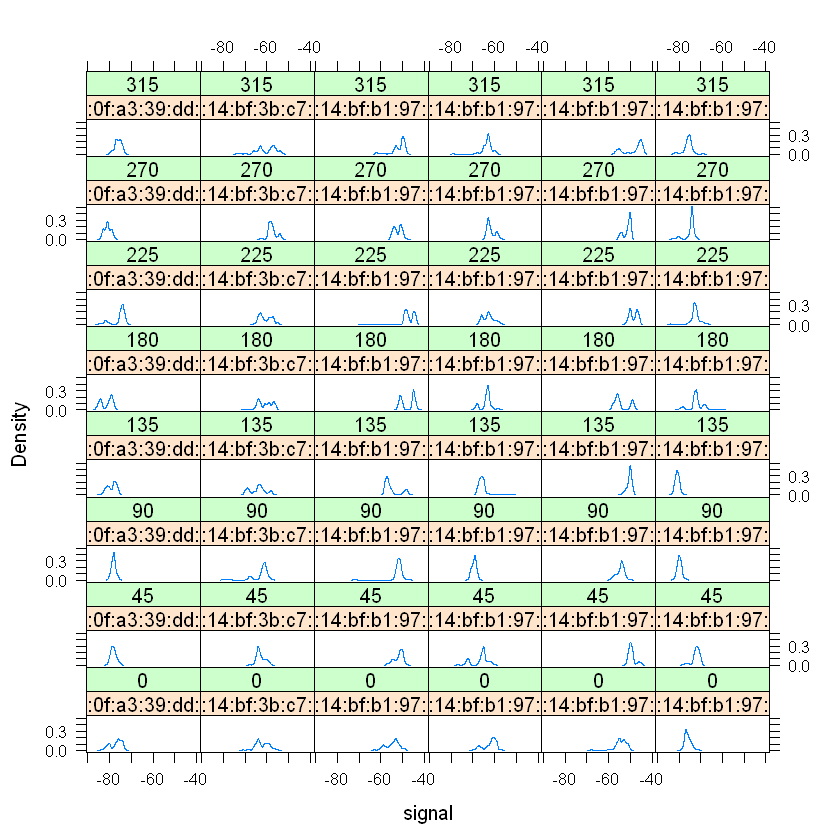

In [19]:
summary(offlinenew$signal)

#pdf(file = "Geo_DensitySignalByMacAngle.pdf", width = 8, height = 12)
oldPar = par(mar = c(3.1, 3, 1, 1))

densityplot( ~ signal | mac + factor(angle), data = offlinenew,
             subset = posX == 24 & posY == 4,
             bw = 0.5, plot.points = FALSE)

par(oldPar)
dev.off()

# Graphs of the Box plots and Density Function of Both Data Set

null device 
          1

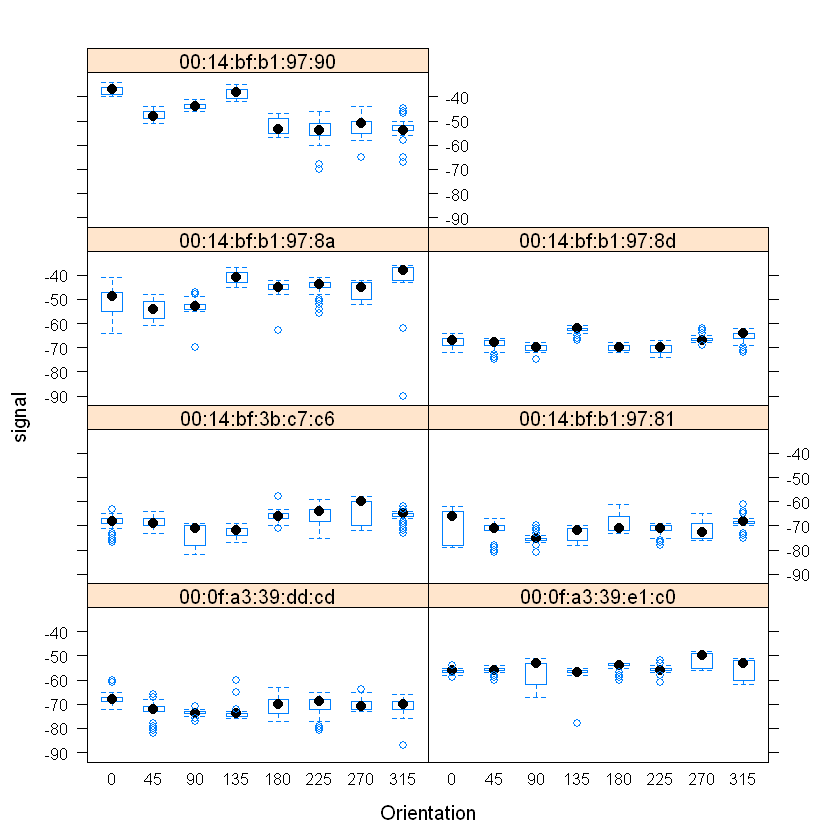

In [185]:
#pdf(file = "Geo_BoxplotSignalByMacAngle.pdf", width = 7)
oldPar = par(mar = c(3.1, 3, 1, 1))

library(lattice)
bwplot(signal ~ factor(angle) | mac, data = offlineBoth, 
       subset = posX == 2 & posY == 12 ,
         xlab="Orientation"       , 
       layout = c(2,4))

par(oldPar)
dev.off()

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    -98     -67     -59     -60     -53     -25 

null device 
          1

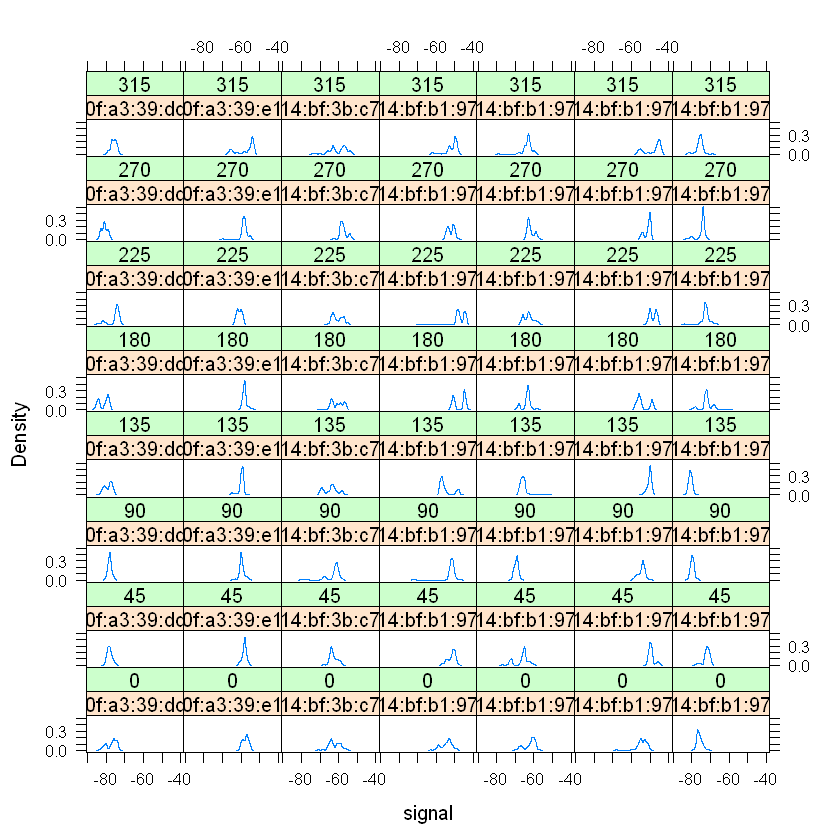

In [21]:
summary(offlineBoth$signal)

#pdf(file = "Geo_DensitySignalByMacAngle.pdf", width = 8, height = 12)
oldPar = par(mar = c(3.1, 3, 1, 1))

densityplot( ~ signal | mac + factor(angle), data = offlineBoth,
             subset = posX == 24 & posY == 4,
             bw = 0.5, plot.points = FALSE)

par(oldPar)
dev.off()

# The SD of Signal Strength by Mean Signal Strength for the Original

In [158]:
#offline = offline[ offline$mac != "00:0f:a3:39:dd:cd", ]

offlineRedo$posXY = paste(offlineRedo$posX, offlineRedo$posY, sep = "-")

byLocAngleAPRedo = with(offlineRedo, 
                    by(offlineRedo, list(posXY, angle, mac), 
                       function(x) x))

In [159]:
signalSummaryRedo = 
  lapply(byLocAngleAPRedo,            
         function(oneLoc) {
           ans = oneLoc[1, ]
           ans$medSignal = median(oneLoc$signal)
           ans$avgSignal = mean(oneLoc$signal)
           ans$num = length(oneLoc$signal)
           ans$sdSignal = sd(oneLoc$signal)
           ans$iqrSignal = IQR(oneLoc$signal)
           ans
           })

null device 
          1

null device 
          1

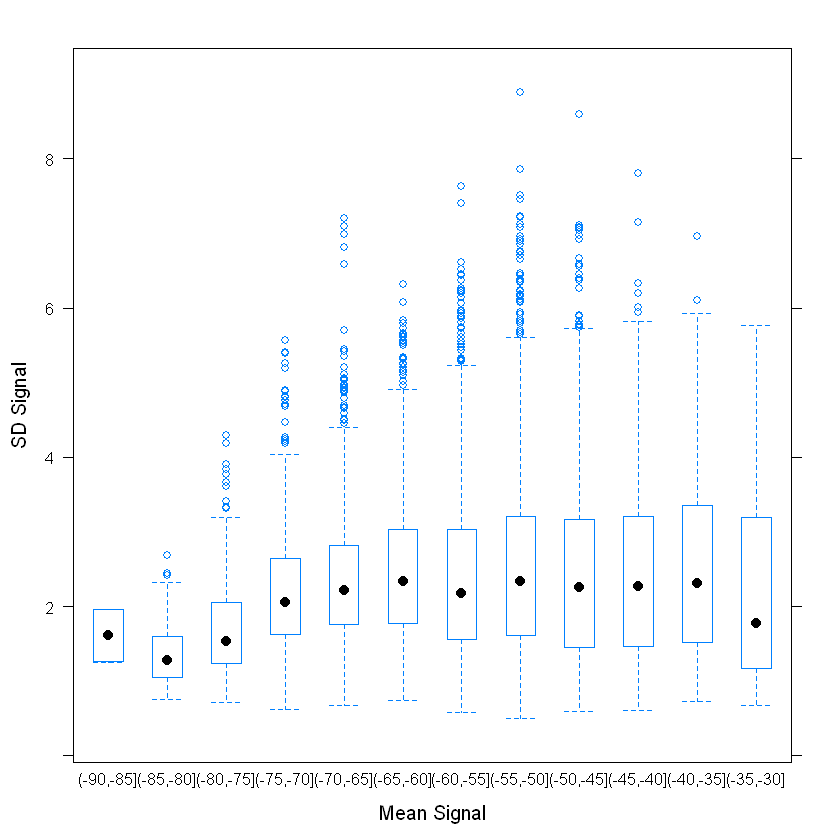

In [160]:
offlineSummaryRedo = do.call("rbind", signalSummaryRedo)     

#pdf(file = "Geo_BoxplotSignalSDByAvg.pdf", width = 10)
oldPar = par(mar = c(3.1, 3, 1, 1))

breaks = seq(-90, -30, by = 5)
bwplot(sdSignal ~ cut(avgSignal, breaks = breaks),
       data = offlineSummaryRedo, 
       subset = mac != "00:0f:a3:39:dd:cd",
       xlab = "Mean Signal", ylab = "SD Signal")

par(oldPar)
dev.off()

#pdf(file = "Geo_ScatterMean-Median.pdf", width = 10)
oldPar = par(mar = c(4.1, 4.1, 1, 1))

with(offlineSummaryRedo,
     smoothScatter((avgSignal - medSignal) ~ num,
                   xlab = "Number of Observations", 
                   ylab = "mean - median"))
abline(h = 0, col = "#984ea3", lwd = 2)
lo.obj = 
  with(offlineSummaryRedo,
       loess(diff ~ num, 
             data = data.frame(diff = (avgSignal - medSignal),
                               num = num)))

lo.obj.pr = predict(lo.obj, newdata = data.frame(num = (70:120)))
lines(x = 70:120, y = lo.obj.pr, col = "#4daf4a", lwd = 2)

par(oldPar)
dev.off()

# The SD of Signal Strength by Mean Signal Strength for the New

In [25]:
#offline = offline[ offline$mac != "00:0f:a3:39:dd:cd", ]

offlinenew$posXY = paste(offlinenew$posX, offlinenew$posY, sep = "-")

byLocAngleAPnew = with(offlinenew, 
                    by(offlinenew, list(posXY, angle, mac), 
                       function(x) x))

In [26]:
signalSummarynew = 
  lapply(byLocAngleAPnew,            
         function(oneLoc) {
           ans = oneLoc[1, ]
           ans$medSignal = median(oneLoc$signal)
           ans$avgSignal = mean(oneLoc$signal)
           ans$num = length(oneLoc$signal)
           ans$sdSignal = sd(oneLoc$signal)
           ans$iqrSignal = IQR(oneLoc$signal)
           ans
           })

null device 
          1

null device 
          1

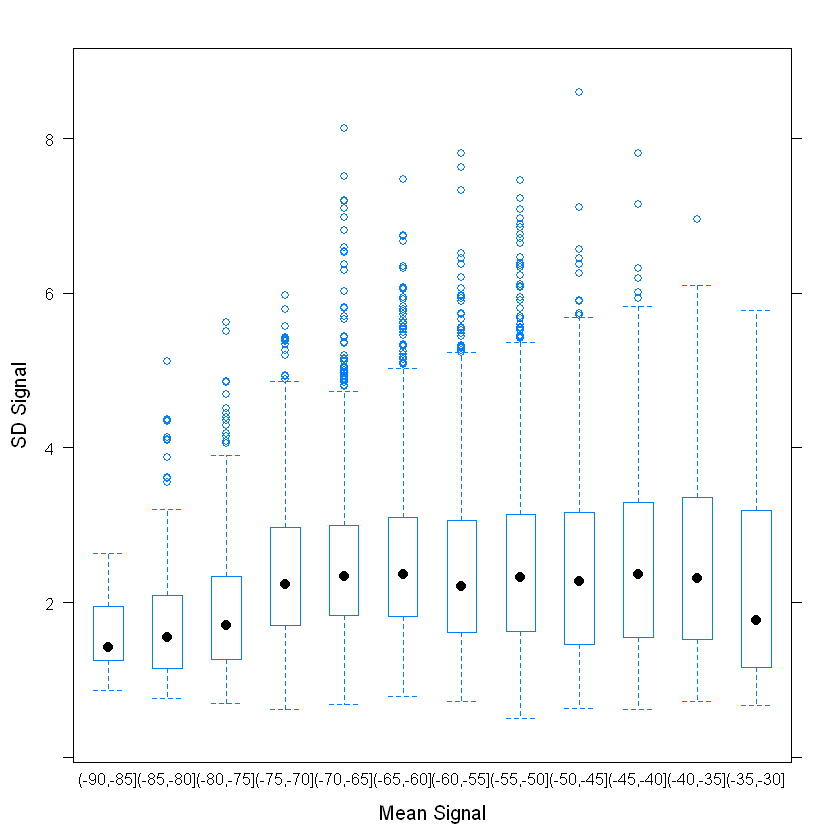

In [27]:
offlineSummarynew = do.call("rbind", signalSummarynew)     

#pdf(file = "Geo_BoxplotSignalSDByAvg.pdf", width = 10)
oldPar = par(mar = c(3.1, 3, 1, 1))

breaks = seq(-90, -30, by = 5)
bwplot(sdSignal ~ cut(avgSignal, breaks = breaks),
       data = offlineSummarynew, 
       
       xlab = "Mean Signal", ylab = "SD Signal")

par(oldPar)
dev.off()

#pdf(file = "Geo_ScatterMean-Median.pdf", width = 10)
oldPar = par(mar = c(4.1, 4.1, 1, 1))

with(offlineSummarynew,
     smoothScatter((avgSignal - medSignal) ~ num,
                   xlab = "Number of Observations", 
                   ylab = "mean - median"))
abline(h = 0, col = "#984ea3", lwd = 2)
lo.obj = 
  with(offlineSummarynew,
       loess(diff ~ num, 
             data = data.frame(diff = (avgSignal - medSignal),
                               num = num)))

lo.obj.pr = predict(lo.obj, newdata = data.frame(num = (70:120)))
lines(x = 70:120, y = lo.obj.pr, col = "#4daf4a", lwd = 2)

par(oldPar)
dev.off()

# The SD of Signal Strength by Mean Signal Strength for Both

In [28]:
#offline = offline[ offline$mac != "00:0f:a3:39:dd:cd", ]

offlineBoth$posXY = paste(offlineBoth$posX, offlineBoth$posY, sep = "-")

byLocAngleAPBoth = with(offlineBoth, 
                    by(offlineBoth, list(posXY, angle, mac), 
                       function(x) x))

In [29]:
signalSummaryBoth = 
  lapply(byLocAngleAPBoth,            
         function(oneLoc) {
           ans = oneLoc[1, ]
           ans$medSignal = median(oneLoc$signal)
           ans$avgSignal = mean(oneLoc$signal)
           ans$num = length(oneLoc$signal)
           ans$sdSignal = sd(oneLoc$signal)
           ans$iqrSignal = IQR(oneLoc$signal)
           ans
           })

null device 
          1

null device 
          1

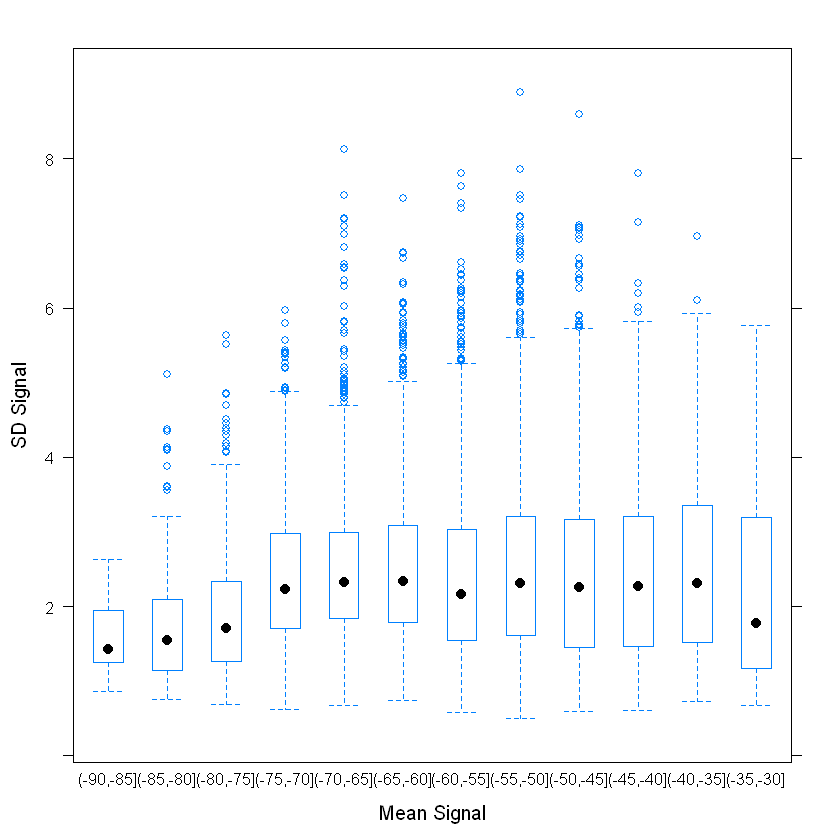

In [31]:
offlineSummaryBoth = do.call("rbind", signalSummaryBoth)     

#pdf(file = "Geo_BoxplotSignalSDByAvg.pdf", width = 10)
oldPar = par(mar = c(3.1, 3, 1, 1))

breaks = seq(-90, -30, by = 5)
bwplot(sdSignal ~ cut(avgSignal, breaks = breaks),
       data = offlineSummaryBoth, 
       
       xlab = "Mean Signal", ylab = "SD Signal")

par(oldPar)
dev.off()

#pdf(file = "Geo_ScatterMean-Median.pdf", width = 10)
oldPar = par(mar = c(4.1, 4.1, 1, 1))

with(offlineSummaryBoth,
     smoothScatter((avgSignal - medSignal) ~ num,
                   xlab = "Number of Observations", 
                   ylab = "mean - median"))
abline(h = 0, col = "#984ea3", lwd = 2)
lo.obj = 
  with(offlineSummaryBoth,
       loess(diff ~ num, 
             data = data.frame(diff = (avgSignal - medSignal),
                               num = num)))

lo.obj.pr = predict(lo.obj, newdata = data.frame(num = (70:120)))
lines(x = 70:120, y = lo.obj.pr, col = "#4daf4a", lwd = 2)

par(oldPar)
dev.off()

# Examining the distribution of signal strength for all 166 locations, 8 angles, and 6 access points.  NOT Used Below

In [17]:

 
oneAPAngle = subset(offlineSummary, 
                    mac == subMacs[5] & angle == 0)





Loading required package: spam
Loading required package: dotCall64
Loading required package: grid
Spam version 2.1-1 (2017-07-02) is loaded.
Type 'help( Spam)' or 'demo( spam)' for a short introduction 
and overview of this package.
Help for individual functions is also obtained by adding the
suffix '.spam' to the function name, e.g. 'help( chol.spam)'.

Attaching package: 'spam'

The following objects are masked from 'package:base':

    backsolve, forwardsolve

Loading required package: maps


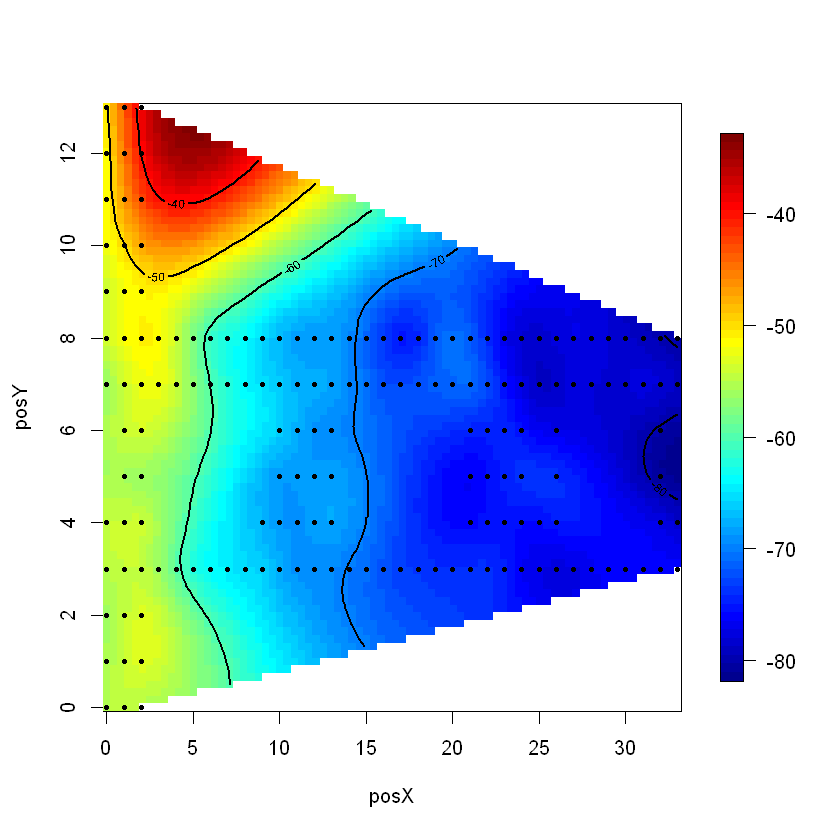

In [31]:
library(fields)
smoothSS = Tps(oneAPAngle[, c("posX","posY")], 
               oneAPAngle$avgSignal)

vizSmooth = predictSurface(smoothSS)

plot.surface(vizSmooth, type = "C")

points(oneAPAngle$posX, oneAPAngle$posY, pch=19, cex = 0.5)

ERROR while rich displaying an object: Error in vapply(seq_along(mapped), function(i) {: values must be length 1,
 but FUN(X[[1]]) result is length 0

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     rpr <- mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     rpr <- mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. mime2repr[[mime]](obj)
8. repr_html.list(obj)
9. repr_list_generic(obj, "html", "\t<li>%s</li>\n", "\t<dt>$%s</dt>\n\t\t<dd>%s</dd>\n", 
 .     "<strong>$%s</strong> = %s", "<ol>\n%s</ol>\n", "<dl>\n%s</dl>\n", 
 .     numeric_item = "\t<dt>[[%s]]</dt>\n\t\

$`00:14:bf:b1:97:90`
NULL

$`00:14:bf:b1:97:90`
NULL

$`00:0f:a3:39:e1:c0`
NULL

$`00:0f:a3:39:e1:c0`
NULL


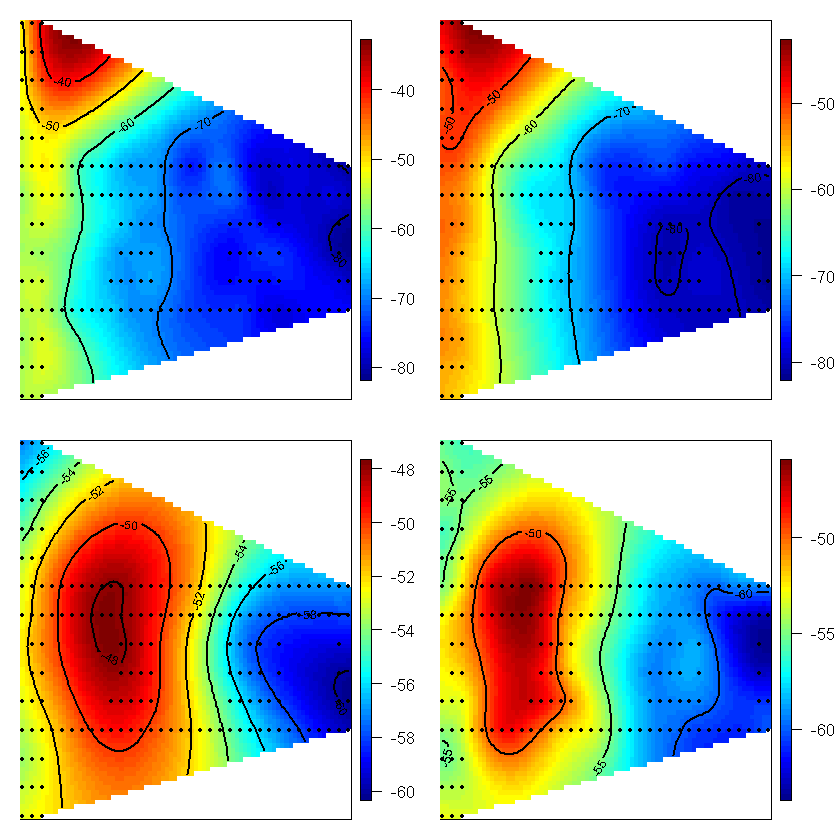

In [32]:
surfaceSS = function(data, mac, angle = 45) {
  require(fields)
  oneAPAngle = data[ data$mac == mac & data$angle == angle, ]
  smoothSS = Tps(oneAPAngle[, c("posX","posY")], 
                 oneAPAngle$avgSignal)
  vizSmooth = predictSurface(smoothSS)
  plot.surface(vizSmooth, type = "C", 
               xlab = "", ylab = "", xaxt = "n", yaxt = "n")
  points(oneAPAngle$posX, oneAPAngle$posY, pch=19, cex = 0.5) 
}

parCur = par(mfrow = c(2,2), mar = rep(1, 4))

mapply(surfaceSS, mac = subMacs[ rep(c(5, 1), each = 2) ], 
       angle = rep(c(0, 135), 2),
       data = list(data = offlineSummary))
 
par(parCur)

offlineSummary = subset(offlineSummary, mac != subMacs[2])

,x,y
00:0f:a3:39:e1:c0,7.5,6.3
00:14:bf:b1:97:8a,2.5,-0.8
00:14:bf:3b:c7:c6,12.8,-2.8
00:14:bf:b1:97:90,1.0,14.0
00:14:bf:b1:97:8d,33.5,9.3
00:14:bf:b1:97:81,33.5,2.8


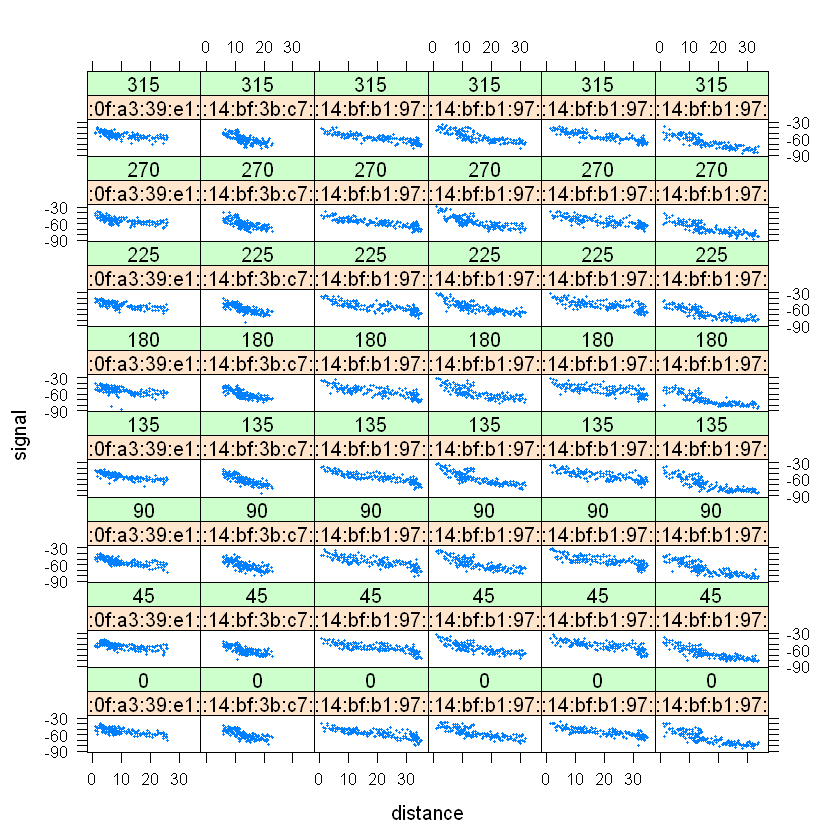

In [33]:
AP = matrix( c( 7.5, 6.3, 2.5, -.8, 12.8, -2.8,  
                1, 14, 33.5, 9.3,  33.5, 2.8),
            ncol = 2, byrow = TRUE,
            dimnames = list(subMacs[ -2 ], c("x", "y") ))

AP

diffs = offlineSummary[ , c("posX", "posY")] - 
          AP[ offlineSummary$mac, ]

offlineSummary$dist = sqrt(diffs[ , 1]^2 + diffs[ , 2]^2)

xyplot(signal ~ dist | factor(mac) + factor(angle), 
       data = offlineSummary, pch = 19, cex = 0.3,
       xlab ="distance")

null device 
          1

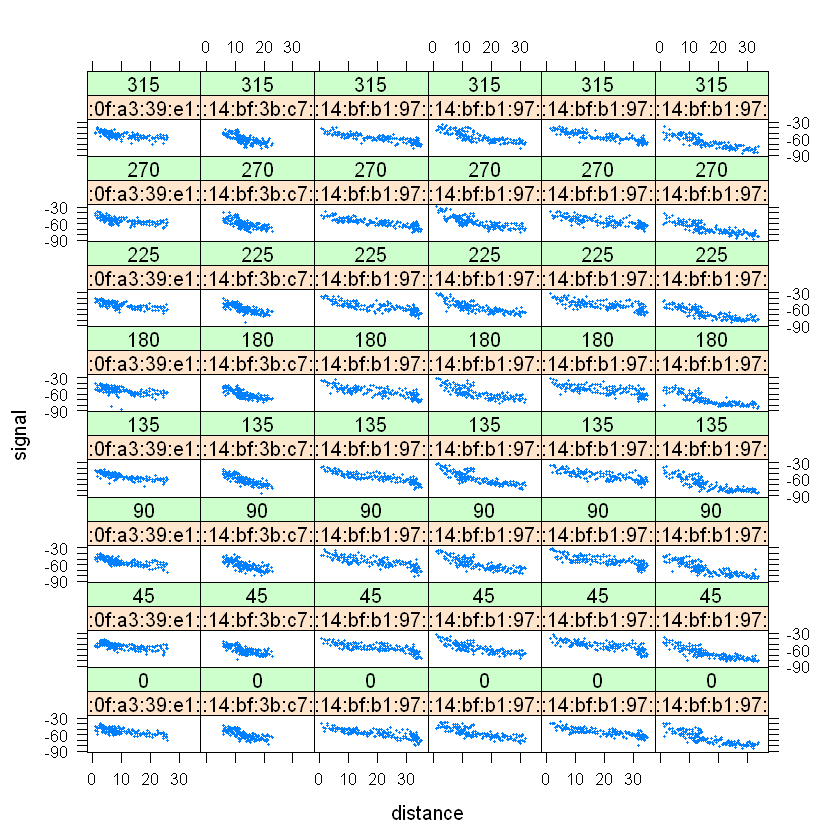

In [34]:
#pdf(file="Geo_ScatterSignalDist.pdf", width = 7, height = 10)
oldPar = par(mar = c(3.1, 3.1, 1, 1))
library(lattice)
xyplot(signal ~ dist | factor(mac) + factor(angle), 
       data = offlineSummary, pch = 19, cex = 0.3,
       xlab ="distance")
par(oldPar)
dev.off()

# Looks at the Signal Strength and Distance Relationship

# Creating Training and Testing Data set for Original

In [161]:
macs = unique(offlineSummaryRedo$mac)
online = readData("online.final.trace.txt", subMacs = macs)

online$posXY = paste(online$posX, online$posY, sep = "-")

length(unique(online$posXY))

tabonlineXYA = table(online$posXY, online$angle)
tabonlineXYA[1:6, ]

keepVars = c("posXY", "posX","posY", "orientation", "angle")
byLoc = with(online, 
             by(online, list(posXY), 
                function(x) {
                  ans = x[1, keepVars]
                  avgSS = tapply(x$signal, x$mac, mean)
                  y = matrix(avgSS, nrow = 1, ncol = 6,
                        dimnames = list(ans$posXY, names(avgSS)))
                  cbind(ans, y)
                }))

onlineSummaryRedo = do.call("rbind", byLoc)  

dim(onlineSummaryRedo)

[1] 60

            
               0  45  90 135 180 225 270 315
  0-0.05       0   0   0 593   0   0   0   0
  0.15-9.42    0   0 606   0   0   0   0   0
  0.31-11.09   0   0   0   0   0 573   0   0
  0.47-8.2   590   0   0   0   0   0   0   0
  0.78-10.94 586   0   0   0   0   0   0   0
  0.93-11.69   0   0   0   0 583   0   0   0

[1] 60 11

In [162]:
names(onlineSummaryRedo)
m = 3; angleNewObs = 230
refs = seq(0, by = 45, length  = 8)
nearestAngle = roundOrientation(angleNewObs)
  
if (m %% 2 == 1) {
  angles = seq(-45 * (m - 1) /2, 45 * (m - 1) /2, length = m)
} else {
  m = m + 1
  angles = seq(-45 * (m - 1) /2, 45 * (m - 1) /2, length = m)
  if (sign(angleNewObs - nearestAngle) > -1) 
    angles = angles[ -1 ]
  else 
    angles = angles[ -m ]
}
angles = angles + nearestAngle
angles[angles < 0] = angles[ angles < 0 ] + 360
angles[angles > 360] = angles[ angles > 360 ] - 360


[1] "posXY"             "posX"              "posY"             
 [4] "orientation"       "angle"             "00:0f:a3:39:e1:c0"
 [7] "00:14:bf:3b:c7:c6" "00:14:bf:b1:97:81" "00:14:bf:b1:97:8a"
[10] "00:14:bf:b1:97:8d" "00:14:bf:b1:97:90"

In [163]:
offlineSubset = 
  offlineSummaryRedo[ offlineSummaryRedo$angle %in% angles, ]

reshapeSS = function(data, varSignal = "signal", 
                     keepVars = c("posXY", "posX","posY")) {
  byLocation =
    with(data, by(data, list(posXY), 
                  function(x) {
                    ans = x[1, keepVars]
                    avgSS = tapply(x[ , varSignal ], x$mac, mean)
                    y = matrix(avgSS, nrow = 1, ncol = 6,
                               dimnames = list(ans$posXY,
                                               names(avgSS)))
                    cbind(ans, y)
                  }))

  newDataSS = do.call("rbind", byLocation)
  return(newDataSS)
}

In [164]:
trainSS = reshapeSS(offlineSubset, varSignal = "avgSignal")

selectTrain = function(angleNewObs, signals = NULL, m = 1){
  # m is the number of angles to keep between 1 and 5
  refs = seq(0, by = 45, length  = 8)
  nearestAngle = roundOrientation(angleNewObs)
  
  if (m %% 2 == 1) 
    angles = seq(-45 * (m - 1) /2, 45 * (m - 1) /2, length = m)
  else {
    m = m + 1
    angles = seq(-45 * (m - 1) /2, 45 * (m - 1) /2, length = m)
    if (sign(angleNewObs - nearestAngle) > -1) 
      angles = angles[ -1 ]
    else 
      angles = angles[ -m ]
  }
  angles = angles + nearestAngle
  angles[angles < 0] = angles[ angles < 0 ] + 360
  angles[angles > 360] = angles[ angles > 360 ] - 360
  angles = sort(angles) 
  
  offlineSubset = signals[ signals$angle %in% angles, ]
  reshapeSS(offlineSubset, varSignal = "avgSignal")
}

In [165]:
train130 = selectTrain(130, offlineSummaryRedo, m = 3)

head(train130)

length(train130[[1]])

findNN = function(newSignal, trainSubset) {
  diffs = apply(trainSubset[ , 4:9], 1, 
                function(x) x - newSignal)
  dists = apply(diffs, 2, function(x) sqrt(sum(x^2)) )
  closest = order(dists)
  return(trainSubset[closest, 1:3 ])
}

,posXY,posX,posY,00:0f:a3:39:e1:c0,00:14:bf:3b:c7:c6,00:14:bf:b1:97:81,00:14:bf:b1:97:8a,00:14:bf:b1:97:8d,00:14:bf:b1:97:90
0-0,0-0,0,0,-52,-66,-63,-36,-64,-55
0-1,0-1,0,1,-53,-65,-64,-39,-65,-59
0-10,0-10,0,10,-56,-66,-69,-45,-67,-50
0-11,0-11,0,11,-55,-67,-70,-48,-67,-55
0-12,0-12,0,12,-56,-70,-72,-45,-67,-50
0-13,0-13,0,13,-55,-71,-73,-43,-69,-54


[1] 166

In [111]:
predXY = function(newSignals, newAngles, trainData, 
                  numAngles = 1, k = 3){
  
  closeXY = list(length = nrow(newSignals))
  
  for (i in 1:nrow(newSignals)) {
    trainSS = selectTrain(newAngles[i], trainData, m = numAngles)
    closeXY[[i]] = 
      findNN(newSignal = as.numeric(newSignals[i, ]), trainSS)
  }

  estXY = lapply(closeXY, 
                 function(x) sapply(x[ , 2:3], 
                                    function(x) mean(x[1:k])))
  estXY = do.call("rbind", estXY)
  return(estXY)
}
estXYkRedo = predXY(newSignals = onlineSummaryRedo[ , 6:11], 
                 newAngles = onlineSummaryRedo[ , 4], 
                 offlineSummaryRedo, numAngles = 3, k = 6)
#estXYkRedo


In [112]:
predXYalt = function(newSignals, newAngles, trainData, 
                  numAngles = 1, k = 3){
  
  closeXY = list(length = nrow(newSignals))
  
  for (i in 1:nrow(newSignals)) {
    trainSS = selectTrain(newAngles[i], trainData, m = numAngles)
    closeXY[[i]] = 
      findNN(newSignal = as.numeric(newSignals[i, ]), trainSS)
  }

 estXY= lapply(closeXY, 
                 function(x) sapply(x[ , 2:3], 
                                    function(x) sum((1/(x+0.01)*x)/sum(1/(x[1:k]+0.01))  )))
  estXY = do.call("rbind", estXY)
  return(estXY)
}
estXYkRedoalt = predXYalt(newSignals = onlineSummaryRedo[ , 6:11], 
                 newAngles = onlineSummaryRedo[ , 4], 
                 offlineSummaryRedo, numAngles = 3, k = 6)

#estXYkRedoalt
#length(estXYkRedoalt)
#((1/(x+0.00001))*(x))/


# Creating Training and Testing Data set for New

In [113]:
macs = unique(offlineSummarynew$mac)
online = readData("online.final.trace.txt", subMacs = macs)

online$posXY = paste(online$posX, online$posY, sep = "-")

length(unique(online$posXY))

tabonlineXYA = table(online$posXY, online$angle)
tabonlineXYA[1:6, ]

keepVars = c("posXY", "posX","posY", "orientation", "angle")
byLoc = with(online, 
             by(online, list(posXY), 
                function(x) {
                  ans = x[1, keepVars]
                  avgSS = tapply(x$signal, x$mac, mean)
                  y = matrix(avgSS, nrow = 1, ncol = 6,
                        dimnames = list(ans$posXY, names(avgSS)))
                  cbind(ans, y)
                }))

onlineSummarynew = do.call("rbind", byLoc)  

dim(onlineSummarynew)

[1] 60

            
               0  45  90 135 180 225 270 315
  0-0.05       0   0   0 594   0   0   0   0
  0.15-9.42    0   0 608   0   0   0   0   0
  0.31-11.09   0   0   0   0   0 574   0   0
  0.47-8.2   591   0   0   0   0   0   0   0
  0.78-10.94 585   0   0   0   0   0   0   0
  0.93-11.69   0   0   0   0 581   0   0   0

[1] 60 11

In [114]:
names(onlineSummarynew)
m = 3; angleNewObs = 230
refs = seq(0, by = 45, length  = 8)
nearestAngle = roundOrientation(angleNewObs)
  
if (m %% 2 == 1) {
  angles = seq(-45 * (m - 1) /2, 45 * (m - 1) /2, length = m)
} else {
  m = m + 1
  angles = seq(-45 * (m - 1) /2, 45 * (m - 1) /2, length = m)
  if (sign(angleNewObs - nearestAngle) > -1) 
    angles = angles[ -1 ]
  else 
    angles = angles[ -m ]
}
angles = angles + nearestAngle
angles[angles < 0] = angles[ angles < 0 ] + 360
angles[angles > 360] = angles[ angles > 360 ] - 360


[1] "posXY"             "posX"              "posY"             
 [4] "orientation"       "angle"             "00:0f:a3:39:dd:cd"
 [7] "00:14:bf:3b:c7:c6" "00:14:bf:b1:97:81" "00:14:bf:b1:97:8a"
[10] "00:14:bf:b1:97:8d" "00:14:bf:b1:97:90"

In [115]:
offlineSubset = 
  offlineSummarynew[ offlineSummarynew$angle %in% angles, ]

reshapeSS = function(data, varSignal = "signal", 
                     keepVars = c("posXY", "posX","posY")) {
  byLocation =
    with(data, by(data, list(posXY), 
                  function(x) {
                    ans = x[1, keepVars]
                    avgSS = tapply(x[ , varSignal ], x$mac, mean)
                    y = matrix(avgSS, nrow = 1, ncol = 6,
                               dimnames = list(ans$posXY,
                                               names(avgSS)))
                    cbind(ans, y)
                  }))

  newDataSS = do.call("rbind", byLocation)
  return(newDataSS)
}

In [116]:
trainSS = reshapeSS(offlineSubset, varSignal = "avgSignal")

selectTrain = function(angleNewObs, signals = NULL, m = 1){
  # m is the number of angles to keep between 1 and 5
  refs = seq(0, by = 45, length  = 8)
  nearestAngle = roundOrientation(angleNewObs)
  
  if (m %% 2 == 1) 
    angles = seq(-45 * (m - 1) /2, 45 * (m - 1) /2, length = m)
  else {
    m = m + 1
    angles = seq(-45 * (m - 1) /2, 45 * (m - 1) /2, length = m)
    if (sign(angleNewObs - nearestAngle) > -1) 
      angles = angles[ -1 ]
    else 
      angles = angles[ -m ]
  }
  angles = angles + nearestAngle
  angles[angles < 0] = angles[ angles < 0 ] + 360
  angles[angles > 360] = angles[ angles > 360 ] - 360
  angles = sort(angles) 
  
  offlineSubset = signals[ signals$angle %in% angles, ]
  reshapeSS(offlineSubset, varSignal = "avgSignal")
}

In [117]:
train130 = selectTrain(130, offlineSummarynew, m = 3)

head(train130)

length(train130[[1]])

findNN = function(newSignal, trainSubset) {
  diffs = apply(trainSubset[ , 4:9], 1, 
                function(x) x - newSignal)
  dists = apply(diffs, 2, function(x) sqrt(sum(x^2)) )
  closest = order(dists)
  return(trainSubset[closest, 1:3 ])
}

,posXY,posX,posY,00:0f:a3:39:dd:cd,00:14:bf:3b:c7:c6,00:14:bf:b1:97:81,00:14:bf:b1:97:8a,00:14:bf:b1:97:8d,00:14:bf:b1:97:90
0-0,0-0,0,0,-72,-66,-63,-36,-64,-55
0-1,0-1,0,1,-70,-65,-64,-39,-65,-59
0-10,0-10,0,10,-70,-66,-69,-45,-67,-50
0-11,0-11,0,11,-71,-67,-70,-48,-67,-55
0-12,0-12,0,12,-69,-70,-72,-45,-67,-50
0-13,0-13,0,13,-73,-71,-73,-43,-69,-54


[1] 166

In [118]:
predXY = function(newSignals, newAngles, trainData, 
                  numAngles = 1, k = 3){
  
  closeXY = list(length = nrow(newSignals))
  
  for (i in 1:nrow(newSignals)) {
    trainSS = selectTrain(newAngles[i], trainData, m = numAngles)
    closeXY[[i]] = 
      findNN(newSignal = as.numeric(newSignals[i, ]), trainSS)
  }

  estXY = lapply(closeXY, 
                 function(x) sapply(x[ , 2:3], 
                                    function(x) mean(x[1:k])))
  estXY = do.call("rbind", estXY)
  return(estXY)
}
estXYknew = predXY(newSignals = onlineSummarynew[ , 6:11], 
                 newAngles = onlineSummarynew[ , 4], 
                 offlineSummarynew, numAngles = 3, k = 6)
                              

In [119]:
predXYalt = function(newSignals, newAngles, trainData, 
                  numAngles = 1, k = 3){
  
  closeXY = list(length = nrow(newSignals))
  
  for (i in 1:nrow(newSignals)) {
    trainSS = selectTrain(newAngles[i], trainData, m = numAngles)
    closeXY[[i]] = 
      findNN(newSignal = as.numeric(newSignals[i, ]), trainSS)
  }

  estXY = lapply(closeXY, 
                 function(x) sapply(x[ , 2:3], 
                                    function(x) sum(((1/(x+0.01))*(x))/sum(1/(x[1:k]+0.01)) )))
  estXY = do.call("rbind", estXY)
  return(estXY)
}
estXYknewalt = predXYalt(newSignals = onlineSummarynew[ , 6:11], 
                 newAngles = onlineSummarynew[ , 4], 
                 offlineSummarynew, numAngles = 3, k = 6)

# Creating Training and Testing Data set for Both

In [120]:
macs = unique(offlineSummaryBoth$mac)
online = readData("online.final.trace.txt", subMacs = macs)

online$posXY = paste(online$posX, online$posY, sep = "-")

length(unique(online$posXY))

tabonlineXYA = table(online$posXY, online$angle)
tabonlineXYA[1:6, ]

keepVars = c("posXY", "posX","posY", "orientation", "angle")
byLoc = with(online, 
             by(online, list(posXY), 
                function(x) {
                  ans = x[1, keepVars]
                  avgSS = tapply(x$signal, x$mac, mean)
                  y = matrix(avgSS, nrow = 1, ncol = 7,
                        dimnames = list(ans$posXY, names(avgSS)))
                  cbind(ans, y)
                }))

onlineSummaryBoth = do.call("rbind", byLoc)  

dim(onlineSummaryBoth)

[1] 60

            
               0  45  90 135 180 225 270 315
  0-0.05       0   0   0 704   0   0   0   0
  0.15-9.42    0   0 717   0   0   0   0   0
  0.31-11.09   0   0   0   0   0 684   0   0
  0.47-8.2   701   0   0   0   0   0   0   0
  0.78-10.94 695   0   0   0   0   0   0   0
  0.93-11.69   0   0   0   0 691   0   0   0

[1] 60 12

In [121]:
names(onlineSummaryBoth)
m = 3; angleNewObs = 230
refs = seq(0, by = 45, length  = 8)
nearestAngle = roundOrientation(angleNewObs)
  
if (m %% 2 == 1) {
  angles = seq(-45 * (m - 1) /2, 45 * (m - 1) /2, length = m)
} else {
  m = m + 1
  angles = seq(-45 * (m - 1) /2, 45 * (m - 1) /2, length = m)
  if (sign(angleNewObs - nearestAngle) > -1) 
    angles = angles[ -1 ]
  else 
    angles = angles[ -m ]
}
angles = angles + nearestAngle
angles[angles < 0] = angles[ angles < 0 ] + 360
angles[angles > 360] = angles[ angles > 360 ] - 360


[1] "posXY"             "posX"              "posY"             
 [4] "orientation"       "angle"             "00:0f:a3:39:dd:cd"
 [7] "00:0f:a3:39:e1:c0" "00:14:bf:3b:c7:c6" "00:14:bf:b1:97:81"
[10] "00:14:bf:b1:97:8a" "00:14:bf:b1:97:8d" "00:14:bf:b1:97:90"

In [122]:
offlineSubset = 
  offlineSummaryBoth[ offlineSummaryBoth$angle %in% angles, ]

reshapeSS = function(data, varSignal = "signal", 
                     keepVars = c("posXY", "posX","posY")) {
  byLocation =
    with(data, by(data, list(posXY), 
                  function(x) {
                    ans = x[1, keepVars]
                    avgSS = tapply(x[ , varSignal ], x$mac, mean)
                    y = matrix(avgSS, nrow = 1, ncol = 7,
                               dimnames = list(ans$posXY,
                                               names(avgSS)))
                    cbind(ans, y)
                  }))

  newDataSS = do.call("rbind", byLocation)
  return(newDataSS)
}

In [123]:
trainSS = reshapeSS(offlineSubset, varSignal = "avgSignal")

selectTrain = function(angleNewObs, signals = NULL, m = 1){
  # m is the number of angles to keep between 1 and 5
  refs = seq(0, by = 45, length  = 8)
  nearestAngle = roundOrientation(angleNewObs)
  
  if (m %% 2 == 1) 
    angles = seq(-45 * (m - 1) /2, 45 * (m - 1) /2, length = m)
  else {
    m = m + 1
    angles = seq(-45 * (m - 1) /2, 45 * (m - 1) /2, length = m)
    if (sign(angleNewObs - nearestAngle) > -1) 
      angles = angles[ -1 ]
    else 
      angles = angles[ -m ]
  }
  angles = angles + nearestAngle
  angles[angles < 0] = angles[ angles < 0 ] + 360
  angles[angles > 360] = angles[ angles > 360 ] - 360
  angles = sort(angles) 
  
  offlineSubset = signals[ signals$angle %in% angles, ]
  reshapeSS(offlineSubset, varSignal = "avgSignal")
}

In [124]:
train130 = selectTrain(130, offlineSummaryBoth, m = 3)

head(train130)

length(train130[[1]])

findNN = function(newSignal, trainSubset) {
  diffs = apply(trainSubset[ , 4:9], 1, 
                function(x) x - newSignal)
  dists = apply(diffs, 2, function(x) sqrt(sum(x^2)) )
  closest = order(dists)
  return(trainSubset[closest, 1:3 ])
}

,posXY,posX,posY,00:0f:a3:39:dd:cd,00:0f:a3:39:e1:c0,00:14:bf:3b:c7:c6,00:14:bf:b1:97:81,00:14:bf:b1:97:8a,00:14:bf:b1:97:8d,00:14:bf:b1:97:90
0-0,0-0,0,0,-72,-52,-66,-63,-36,-64,-55
0-1,0-1,0,1,-70,-53,-65,-64,-39,-65,-59
0-10,0-10,0,10,-70,-56,-66,-69,-45,-67,-50
0-11,0-11,0,11,-71,-55,-67,-70,-48,-67,-55
0-12,0-12,0,12,-69,-56,-70,-72,-45,-67,-50
0-13,0-13,0,13,-73,-55,-71,-73,-43,-69,-54


[1] 166

In [125]:
predXY = function(newSignals, newAngles, trainData, 
                  numAngles = 1, k = 3){
  
  closeXY = list(length = nrow(newSignals))
  
  for (i in 1:nrow(newSignals)) {
    trainSS = selectTrain(newAngles[i], trainData, m = numAngles)
    closeXY[[i]] = 
      findNN(newSignal = as.numeric(newSignals[i, ]), trainSS)
  }

  estXY = lapply(closeXY, 
                 function(x) sapply(x[ , 2:3], 
                                    function(x) mean(x[1:k])))
  estXY = do.call("rbind", estXY)
  return(estXY)
}
estXYkBoth = predXY(newSignals = onlineSummaryBoth[ , 6:11], 
                 newAngles = onlineSummaryBoth[ , 4], 
                 offlineSummaryBoth, numAngles = 3, k = 6)

In [126]:
predXYalt = function(newSignals, newAngles, trainData, 
                  numAngles = 1, k = 3){
  
  closeXY = list(length = nrow(newSignals))
  
  for (i in 1:nrow(newSignals)) {
    trainSS = selectTrain(newAngles[i], trainData, m = numAngles)
    closeXY[[i]] = 
      findNN(newSignal = as.numeric(newSignals[i, ]), trainSS)
  }

  estXY = lapply(closeXY, 
                 function(x) sapply(x[ , 2:3], 
                                    function(x) sum(((1/(x+0.01))*(x))/sum(1/(x[1:k]+0.01)) )))
  estXY = do.call("rbind", estXY)
  return(estXY)
}
estXYkBothalt = predXYalt(newSignals = onlineSummaryBoth[ , 6:11], 
                 newAngles = onlineSummaryBoth[ , 4], 
                 offlineSummaryBoth, numAngles = 3, k = 6)
#estXYkBothalt
#nrow(estXYkBothalt)

# Creates the functions for the KNN and cross validation - NOT Used Below

In [184]:
predXY = function(newSignals, newAngles, trainData, 
                  numAngles = 1, k = 3){
  
  closeXY = list(length = nrow(newSignals))
  
  for (i in 1:nrow(newSignals)) {
    trainSS = selectTrain(newAngles[i], trainData, m = numAngles)
    closeXY[[i]] = 
      findNN(newSignal = as.numeric(newSignals[i, ]), trainSS)
  }

  estXY = lapply(closeXY, 
                 function(x) sapply(x[ , 2:3], 
                                    function(x) mean(x[1:k])))
  estXY = do.call("rbind", estXY)
  return(estXY)
}
estXYkRedo = predXY(newSignals = onlineSummaryRedo[ , 6:11], 
                 newAngles = onlineSummaryRedo[ , 4], 
                 offlineSummaryRedo, numAngles = 3, k = 6)

estXYknew = predXY(newSignals = onlineSummarynew[ , 6:11], 
                 newAngles = onlineSummarynew[ , 4], 
                 offlineSummarynew, numAngles = 3, k = 6)
                                    
estXYkBoth = predXY(newSignals = onlineSummaryBoth[ , 6:11], 
                 newAngles = onlineSummaryBoth[ , 4], 
                 offlineSummaryBoth, numAngles = 3, k = 6)

Warning message in matrix(avgSS, nrow = 1, ncol = 7, dimnames = list(ans$posXY, :
"data length [6] is not a sub-multiple or multiple of the number of columns [7]"

ERROR: Error in matrix(avgSS, nrow = 1, ncol = 7, dimnames = list(ans$posXY, : length of 'dimnames' [2] not equal to array extent


# Predictions of the new locations.

# Mapping Not Used

In [41]:
floorErrorMap = function(estXY, actualXY, trainPoints = NULL, AP = NULL){
  
    plot(0, 0, xlim = c(0, 35), ylim = c(-3, 15), type = "n",
         xlab = "", ylab = "", axes = FALSE)
    box()
    if ( !is.null(AP) ) points(AP, pch = 15)
    if ( !is.null(trainPoints) )
      points(trainPoints, pch = 19, col="grey", cex = 0.6)
    
    points(x = actualXY[, 1], y = actualXY[, 2], 
           pch = 19, cex = 0.8 )
    points(x = estXY[, 1], y = estXY[, 2], 
           pch = 8, cex = 0.8 )
    segments(x0 = estXY[, 1], y0 = estXY[, 2],
             x1 = actualXY[, 1], y1 = actualXY[ , 2],
             lwd = 2, col = "red")
}

null device 
          1

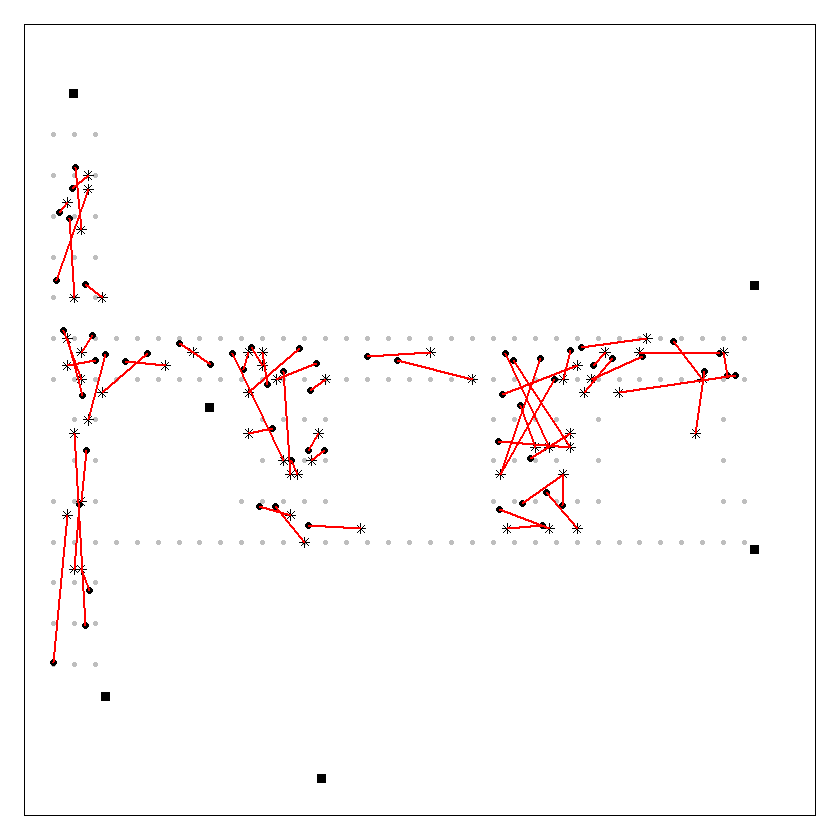

In [42]:
trainPoints = offlineSummary[ offlineSummary$angle == 0 & 
                              offlineSummary$mac == "00:0f:a3:39:e1:c0" ,
                        c("posX", "posY")]

#pdf(file="GEO_FloorPlanK3Errors.pdf", width = 10, height = 7)
oldPar = par(mar = c(1, 1, 1, 1))
floorErrorMap(estXYk3, onlineSummary[ , c("posX","posY")], 
              trainPoints = trainPoints, AP = AP)
par(oldPar)
dev.off()

null device 
          1

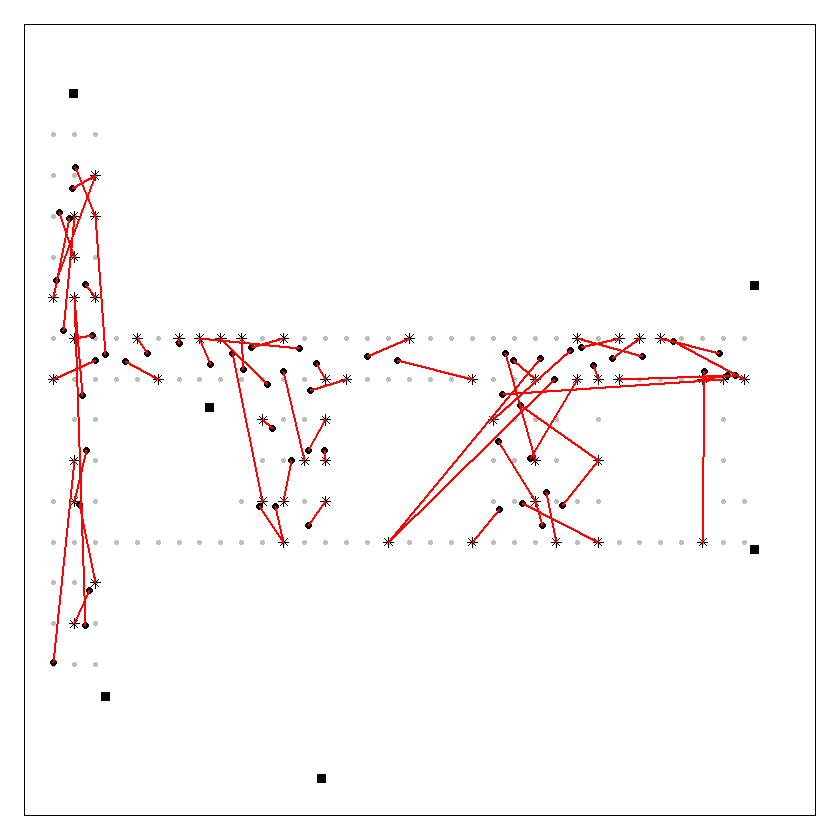

In [43]:
#pdf(file="GEO_FloorPlanK1Errors.pdf", width = 10, height = 7)
oldPar = par(mar = c(1, 1, 1, 1))
floorErrorMap(estXYk1, onlineSummary[ , c("posX","posY")], 
              trainPoints = trainPoints, AP = AP)
par(oldPar)
dev.off()

# Mapping of the error of the locations - NOT Used

In [131]:
calcError = 
function(estXY, actualXY) 
   sum( rowSums( (estXY - actualXY)^2) )

actualXYRedo = onlineSummaryRedo[ , c("posX", "posY")]
sapply(list(estXYkRedo,estXYkRedoalt), calcError, actualXYRedo)
actualXYnew = onlineSummarynew[ , c("posX", "posY")]
sapply(list(estXYknew,estXYknewalt), calcError, actualXYnew)
actualXYBoth = onlineSummaryBoth[ , c("posX", "posY")]
sapply(list(estXYkBoth,estXYkBothalt), calcError, actualXYBoth)

#sapply(estXYkRedoalt, calcError, actualXY)


[1] 2.7e+02 1.2e+07

[1] 2.5e+02 1.2e+07

[1] 2.3e+02 1.2e+07

In [309]:
calcError = 
function(estXY, actualXY) 
   sum( rowSums( (estXY - actualXY)^2) )

actualXY = onlineSummary[ , c("posX", "posY")]
sapply(list(estXYkRedo, estXYknew, estXYkBoth), calcError, actualXY)
sapply(list(estXYkRedoalt, estXYknewalt, estXYkBothalt), calcError, actualXY)
sapply(estXYkRedoalt,calcError,estXYkRedo)
sapply(estXYknewalt,calcError,estXYknew)
sapply(estXYkBothalt,calcError,estXYkBoth)



[1] 272 252 230

[1] 1.4e+07 1.4e+07 1.4e+07

[1] 2.0e+04 2.0e+04 2.0e+04 1.0e+05 2.0e+04 2.0e+04 2.0e+04 2.0e+04 2.0e+04
 [10] 2.0e+04 2.0e+04 2.0e+04 2.0e+04 2.0e+04 5.9e+06 8.0e+06 1.1e+07 9.9e+06
 [19] 1.3e+07 7.1e+06 8.9e+06 1.5e+07 1.4e+07 9.8e+06 1.1e+07 2.9e+07 3.7e+07
 [28] 2.0e+04 1.3e+05 4.9e+07 4.7e+07 4.7e+07 4.9e+07 5.5e+07 4.7e+07 5.0e+07
 [37] 5.0e+07 3.5e+07 4.2e+07 5.0e+07 4.0e+07 5.0e+07 5.6e+07 6.5e+07 5.4e+07
 [46] 5.9e+07 5.0e+07 8.0e+07 1.1e+06 8.8e+07 6.6e+07 9.2e+07 7.3e+07 2.0e+04
 [55] 1.9e+06 3.5e+06 9.4e+06 9.4e+06 1.1e+07 1.1e+07 1.8e+05 1.3e+07 1.1e+07
 [64] 2.0e+04 8.3e+06 1.2e+07 1.1e+07 2.0e+04 2.1e+06 7.2e+06 1.9e+06 8.0e+05
 [73] 2.0e+04 4.6e+06 4.6e+06 1.8e+06 7.9e+05 1.5e+06 2.2e+06 4.0e+06 1.8e+06
 [82] 9.7e+05 4.4e+06 3.9e+06 1.6e+06 4.6e+06 4.6e+06 3.6e+06 1.2e+06 1.6e+06
 [91] 7.9e+05 4.2e+06 2.6e+06 2.4e+06 2.5e+06 1.6e+06 1.9e+06 9.0e+05 7.9e+05
[100] 9.7e+05 1.1e+06 1.7e+06 4.1e+06 4.9e+06 4.6e+06 2.7e+06 2.8e+06 4.6e+06
[109] 4.4e+06 3.0e+06 4.2e+06 3.6e+06 4.0e+06 2.6e+06 2.0e+06 3.1e+06 2.7e+06
[118] 3.1e+06 4.4e+06 8.4e+05

[1] 2.0e+04 2.0e+04 2.0e+04 7.3e+04 2.0e+04 2.0e+04 2.0e+04 2.0e+04 2.0e+04
 [10] 2.0e+04 2.0e+04 2.0e+04 2.0e+04 2.0e+04 5.3e+06 1.0e+07 1.3e+07 9.3e+06
 [19] 1.1e+07 1.2e+07 1.1e+07 1.2e+07 9.5e+06 1.1e+07 1.4e+07 2.4e+07 3.7e+07
 [28] 2.0e+04 1.4e+05 4.9e+07 4.9e+07 4.2e+07 5.2e+07 3.7e+07 4.7e+07 4.5e+07
 [37] 5.0e+07 4.4e+07 2.6e+07 5.0e+07 5.1e+07 5.0e+07 5.6e+07 5.5e+07 5.7e+07
 [46] 5.9e+07 5.1e+07 8.4e+07 2.0e+06 8.9e+07 6.6e+07 9.3e+07 8.2e+07 2.0e+04
 [55] 1.6e+06 2.5e+06 5.9e+06 8.7e+06 1.0e+07 9.8e+06 6.2e+05 1.2e+07 1.1e+07
 [64] 2.0e+04 8.9e+06 1.1e+07 1.1e+07 2.0e+04 4.6e+06 7.5e+06 1.7e+06 4.1e+05
 [73] 2.0e+04 4.6e+06 4.9e+06 1.6e+06 7.9e+05 1.6e+06 2.0e+06 3.0e+06 1.6e+06
 [82] 1.1e+06 4.4e+06 4.6e+06 1.9e+06 4.6e+06 4.2e+06 3.6e+06 1.1e+06 9.7e+05
 [91] 7.9e+05 4.1e+06 2.7e+06 3.9e+06 2.7e+06 2.9e+06 1.0e+06 1.1e+06 7.1e+05
[100] 9.7e+05 1.3e+06 2.1e+06 4.1e+06 4.4e+06 4.9e+06 3.5e+06 1.9e+06 1.6e+06
[109] 4.4e+06 2.3e+06 2.7e+06 3.1e+06 4.2e+06 2.1e+06 1.9e+06 2.0e+06 4.6e+06
[118] 4.4e+06 4.6e+06 1.0e+06

[1] 2.0e+04 2.0e+04 2.0e+04 2.0e+04 2.0e+04 2.0e+04 2.0e+04 2.0e+04 2.0e+04
 [10] 2.0e+04 2.0e+04 2.0e+04 2.0e+04 2.0e+04 4.8e+06 1.0e+07 1.1e+07 9.6e+06
 [19] 1.2e+07 1.0e+07 1.3e+07 1.2e+07 9.2e+06 9.8e+06 1.4e+07 1.9e+07 3.6e+07
 [28] 2.0e+04 2.0e+04 4.9e+07 4.9e+07 4.2e+07 4.8e+07 3.0e+07 4.7e+07 4.8e+07
 [37] 5.0e+07 5.0e+07 4.1e+07 4.7e+07 5.0e+07 4.5e+07 5.5e+07 5.7e+07 5.8e+07
 [46] 6.3e+07 4.8e+07 8.0e+07 5.7e+05 8.8e+07 7.5e+07 9.2e+07 8.6e+07 2.0e+04
 [55] 1.7e+06 2.6e+06 5.3e+06 8.3e+06 9.3e+06 1.1e+07 9.1e+05 1.1e+07 1.1e+07
 [64] 2.0e+04 9.3e+06 1.2e+07 1.1e+07 2.0e+04 4.6e+06 5.2e+06 1.9e+06 1.2e+06
 [73] 2.0e+04 4.4e+06 4.9e+06 2.8e+06 8.7e+05 1.8e+06 2.0e+06 3.3e+06 1.9e+06
 [82] 1.1e+06 4.4e+06 4.4e+06 1.9e+06 4.4e+06 4.2e+06 4.5e+06 2.0e+04 1.3e+06
 [91] 7.9e+05 4.1e+06 3.2e+06 2.9e+06 2.5e+06 2.3e+06 9.3e+05 1.2e+06 1.0e+06
[100] 8.7e+05 1.6e+06 1.6e+06 4.6e+06 4.9e+06 4.9e+06 3.7e+06 1.8e+06 4.6e+06
[109] 4.4e+06 3.0e+06 4.4e+06 2.4e+06 4.4e+06 3.2e+06 1.8e+06 2.1e+06 4.6e+06
[118] 4.4e+06 4.6e+06 9.3e+05

In [168]:
v = 11
set.seed(2019)
permuteLocs = sample(unique(offlineSummaryRedo$posXY))
permuteLocs = matrix(permuteLocs, ncol = v, 
                     nrow = floor(length(permuteLocs)/v))

onlineFold = subset(offlineSummaryRedo, posXY %in% permuteLocs[ , 1])

reshapeSS = function(data, varSignal = "signal", 
                     keepVars = c("posXY", "posX","posY"),
                     sampleAngle = FALSE, 
                     refs = seq(0, 315, by = 45)) {
  set.seed(2019)
    byLocation =
    with(data, by(data, list(posXY), 
                  function(x) {
                    if (sampleAngle) {
                      x = x[x$angle == sample(refs, size = 1), ]}
                    ans = x[1, keepVars]
                    avgSS = tapply(x[ , varSignal ], x$mac, mean)
                    y = matrix(avgSS, nrow = 1, ncol = 6,
                               dimnames = list(ans$posXY,
                                               names(avgSS)))
                    cbind(ans, y)
                  }))

  newDataSS = do.call("rbind", byLocation)
  return(newDataSS)
}

offline = offlineRedo[ offlineRedo$mac != "00:0f:a3:39:dd:cd", ]

Warning message in matrix(permuteLocs, ncol = v, nrow = floor(length(permuteLocs)/v)):
"data length [166] is not a sub-multiple or multiple of the number of rows [15]"

In [170]:
keepVars = c("posXY", "posX","posY", "orientation", "angle")

onlineCVSummary = reshapeSS(offline, keepVars = keepVars, 
                            sampleAngle = TRUE)

onlineFold = subset(onlineCVSummary, 
                    posXY %in% permuteLocs[ , 1])

offlineFold = subset(offlineSummaryRedo,
                     posXY %in% permuteLocs[ , -1])

estFold = predXY(newSignals = onlineFold[ , 6:11], 
                 newAngles = onlineFold[ , 4], 
                 offlineFold, numAngles = 3, k = 3)

actualFold = onlineFold[ , c("posX", "posY")]
calcError(estFold, actualFold)

K = 20
err = rep(0, K)

[1] 153

### Next Cell takes a while.  Grab a Beverage of your choice.  (~5-10 mins)

In [172]:

for (j in 1:v) {
  onlineFold = subset(onlineCVSummary, 
                      posXY %in% permuteLocs[ , j])
  offlineFold = subset(offlineSummaryRedo,
                       posXY %in% permuteLocs[ , -j])
  actualFold = onlineFold[ , c("posX", "posY")]
  
  for (k in 1:K) {
    estFold = predXY(newSignals = onlineFold[ , 6:11],
                     newAngles = onlineFold[ , 4], 
                     offlineFold, numAngles = 3, k = k)
    err[k] = err[k] + calcError(estFold, actualFold)
  }
}

null device 
          1

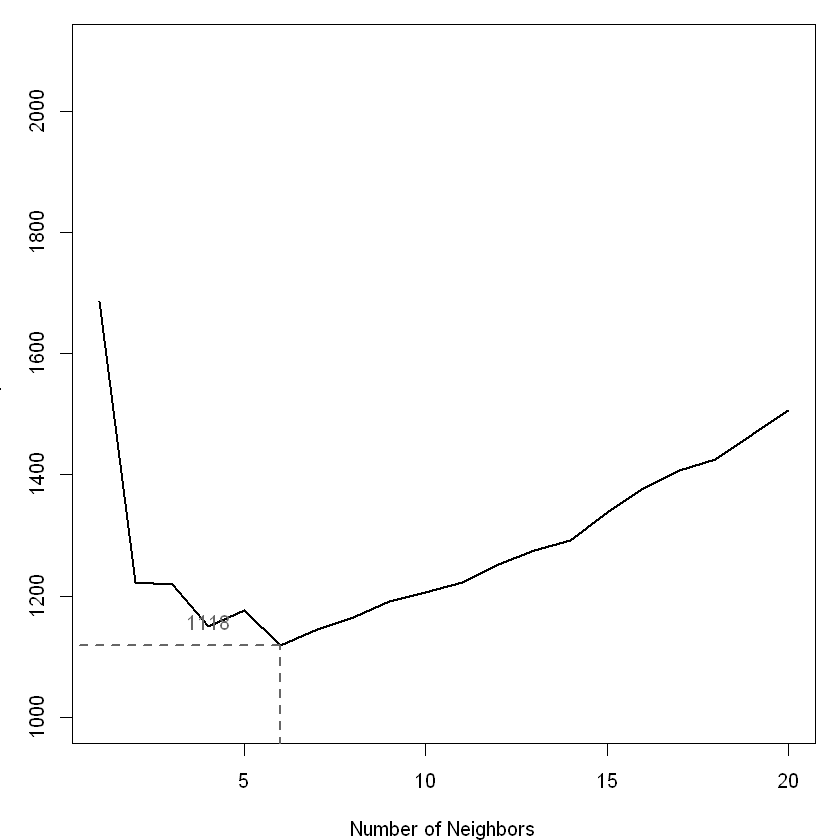

In [173]:
#pdf(file = "Geo_CVChoiceOfK.pdf", width = 10, height = 6)
oldPar = par(mar = c(4, 3, 1, 1))
plot(y = err, x = (1:K),  type = "l", lwd= 2,
     ylim = c(1000, 2100),
     xlab = "Number of Neighbors",
     ylab = "Sum of Square Errors")

rmseMin = min(err)
kMin = which(err == rmseMin)[1]
segments(x0 = 0, x1 = kMin, y0 = rmseMin, col = gray(0.4), 
         lty = 2, lwd = 2)
segments(x0 = kMin, x1 = kMin, y0 = 900,  y1 = rmseMin, 
         col = grey(0.4), lty = 2, lwd = 2)

#mtext(kMin, side = 1, line = 1, at = kMin, col = grey(0.4))
text(x = kMin - 2, y = rmseMin + 40, 
     label = as.character(round(rmseMin)), col = grey(0.4))
par(oldPar)
dev.off()


In [179]:
estXYk5 = predXY(newSignals = onlineSummaryRedo[ , 6:11], 
                 newAngles = onlineSummaryRedo[ , 4], 
                 offlineSummaryRedo, numAngles = 3, k = 6)

calcError(estXYk5, actualXY)

[1] 272

In [81]:
predXY = function(newSignals, newAngles, trainData, 
                  numAngles = 1, k = 3){
  
  closeXY = list(length = nrow(newSignals))
  
  for (i in 1:nrow(newSignals)) {
    trainSS = selectTrain(newAngles[i], trainData, m = numAngles)
    closeXY[[i]] = findNN(newSignal = as.numeric(newSignals[i, ]),
                           trainSS)
  }

  estXY = lapply(closeXY, function(x)
                            sapply(x[ , 2:3], 
                                    function(x) mean(x[1:k])))
  estXY = do.call("rbind", estXY)
  return(estXY)
}